In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
import numpy as np
from pyuvdata import UVCal, UVData
import os
import sys
import glob
import uvtools as uvt
from astropy.time import Time
from astropy.coordinates import EarthLocation, AltAz, Angle
from astropy.coordinates import SkyCoord as sc
import pandas
import warnings 
import copy
from hera_notebook_templates import utils
import hera_qm
from hera_mc import cm_hookup
import h5py
import importlib
from scipy import stats
from IPython.display import display, HTML
from scipy.signal import find_peaks
#warnings.filterwarnings('ignore')

from scipy import signal
from numpy.fft import ifft
from numpy.random import default_rng

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
display(HTML("<style>.container { width:100% !important; }</style>"))

could not import sklearn


In [2]:
#get data location
JD = 2459144
data_path = '/lustre/aoc/projects/hera/lberkhou/2459144'
ant_metrics_ext = ".known_good.ant_metrics.hdf5"
statuses = 'RF_ok,digital_ok,digital_maintenance,calibration_ok,RF_maintenance'
utc = Time(JD, format='jd').datetime
print(f'JD = {JD}')
print(f'Date = {utc.month}-{utc.day}-{utc.year}')
print(f'data_path = "{data_path}"')

JD = 2459144
Date = 10-21-2020
data_path = "/lustre/aoc/projects/hera/lberkhou/2459144"


In [3]:
def plot_four_clocks (ant1, ant2, ant3, ant4):
    fig, ax = plt.subplots(2 , 2, figsize = (15,12))

    data1 = uvd.get_data(ant1,ant1,'XX')
    data2 = uvd.get_data(ant1,ant1,'YY')
    freq = uvd.freq_array[0]*1e-6 #converted to MegaHz

    clocks1, _ = find_peaks(np.average(data1, axis=0), distance=400)
    clocks2, _ = find_peaks(np.average(data2, axis=0), distance=400)
    ax[0,0].plot(freq,np.average(data1, axis=0))
    ax[0,0].plot(freq[clocks1],np.average(data1, axis=0)[clocks1],"xr")
    ax[0,0].plot(freq,np.average(data2, axis=0))
    ax[0,0].plot(freq[clocks2],np.average(data2, axis=0)[clocks2],"xr")
    ax[0,0].set_yscale('log')
    ax[0,0].set_xlabel(f'Frequency (MHz) of antenna {ant1}')

    data3 = uvd.get_data(ant2,ant2,'XX')
    data4 = uvd.get_data(ant2,ant2,'YY')
    freq = uvd.freq_array[0]*1e-6 #converted to MegaHz

    clocks3, _ = find_peaks(np.average(data3, axis=0), distance=400)
    clocks4, _ = find_peaks(np.average(data4, axis=0), distance=400)
    ax[0,1].plot(freq,np.average(data3, axis=0))
    ax[0,1].plot(freq[clocks3],np.average(data3, axis=0)[clocks3],"xr")
    ax[0,1].plot(freq,np.average(data4, axis=0))
    ax[0,1].plot(freq[clocks4],np.average(data4, axis=0)[clocks4],"xr")
    ax[0,1].set_yscale('log')
    ax[0,1].set_xlabel(f'Frequency (MHz) of antenna {ant2}')

    data5 = uvd.get_data(ant3,ant3,'XX')
    data6 = uvd.get_data(ant3,ant3,'YY')
    freq = uvd.freq_array[0]*1e-6 #converted to MegaHz

    clocks5, _ = find_peaks(np.average(data5, axis=0), distance=400)
    clocks6, _ = find_peaks(np.average(data6, axis=0), distance=400)
    ax[1,0].plot(freq,np.average(data5, axis=0))
    ax[1,0].plot(freq[clocks5],np.average(data5, axis=0)[clocks5],"xr")
    ax[1,0].plot(freq,np.average(data6, axis=0))
    ax[1,0].plot(freq[clocks6],np.average(data6, axis=0)[clocks6],"xr")
    ax[1,0].set_yscale('log')
    ax[1,0].set_xlabel(f'Frequency (MHz) of antenna {ant3}')

    data7 = uvd.get_data(ant4,ant4,'XX')
    data8 = uvd.get_data(ant4,ant4,'YY')
    freq = uvd.freq_array[0]*1e-6 #converted to MegaHz

    clocks7, _ = find_peaks(np.average(data7, axis=0), distance=400)
    clocks8, _ = find_peaks(np.average(data8, axis=0), distance=400)
    fig = plt.figure(figsize=(12,12))
    ax[1,1].plot(freq,np.average(data7, axis=0))
    ax[1,1].plot(freq[clocks7],np.average(data7, axis=0)[clocks7],"xr")
    ax[1,1].plot(freq,np.average(data8, axis=0))
    ax[1,1].plot(freq[clocks8],np.average(data8, axis=0)[clocks8],"xr")
    ax[1,1].set_yscale('log')
    ax[1,1].set_xlabel(f'Frequency (MHz) of antenna {ant4}')

    #fig = plt.figure(figsize=(12,12))
    #plt.plot(freq,data1[187,:])
    #plt.plot(freq,data2[187,:])
    #plt.yscale('log')
    #plt.xlabel('Frequency (MHz)')
    #print (len(freq))
    print (freq[128], freq[640], freq[1152])
    print (freq[128], freq[640], freq[1152])

In [21]:
def plot_four_noclocks_even (ant1, ant2, ant3, ant4, start, space, num):
    #print(clocks1)
    # print((-np.average(data1, axis=0)).argsort()[:3])
    fig, ax = plt.subplots(2 , 2, figsize = (15,12))
    
    #ax = axes[0, 0]
    
    data1 = uvd.get_data(ant1,ant1,'XX')
    data2 = uvd.get_data(ant1,ant1,'YY')
    data3 = uvd.get_data(ant2,ant2,'XX')
    data4 = uvd.get_data(ant2,ant2,'YY')
    data5 = uvd.get_data(ant3,ant3,'XX')
    data6 = uvd.get_data(ant3,ant3,'YY')
    data7 = uvd.get_data(ant4,ant4,'XX')
    data8 = uvd.get_data(ant4,ant4,'YY')
    freq = uvd.freq_array[0]*1e-6 #converted to MegaHz

    data1_avg = np.average(data1, axis=0)
    data1_avg[128] = (data1_avg[127] + data1_avg[129])/2
    data1_avg[1152] = (data1_avg[1151] + data1_avg[1153])/2
    data1_avg[640] = (data1_avg[639] + data1_avg[641])/2
    data2_avg = np.average(data2, axis=0)
    data2_avg[128] = (data2_avg[127] + data2_avg[129])/2
    data2_avg[1152] = (data2_avg[1151] + data2_avg[1153])/2
    data2_avg[640] = (data2_avg[639] + data2_avg[641])/2
    peaks1, _ = find_peaks(data1_avg[0:768], distance=40)
    peaks2, _ = find_peaks(data2_avg[0:768], distance=40)
    ax[0,0].plot(freq[0:768],data1_avg[0:768])
    #ax[0,0].plot(freq[peaks1],data1_avg[peaks1],"xr")
    ax[0,0].plot(freq[0:768],data2_avg[0:768])
    #ax[0,0].plot(freq[peaks2],data2_avg[peaks2],"xr")
    #ax[0,0].legend()
    
    axmin, axmax = ax[0,0].get_ylim()
    
    lines = np.arange(0,num,1)
    number = 0
        
    for i in lines:
        ax[0,0].vlines(start+space*number, ymin = 0, ymax = axmax, color = 'k', ls = '--', alpha = 0.5)
        number = (number + 1)
        
    ax[0,0].set_title(f'Antenna {ant1}')
    ax[0,0].set_yscale('log')
    ax[0,0].set_xlabel(f'Frequency (MHz)')


    data3_avg = np.average(data3, axis=0)
    data3_avg[128] = (data3_avg[127] + data3_avg[129])/2
    data3_avg[1152] = (data3_avg[1151] + data3_avg[1153])/2
    data3_avg[640] = (data3_avg[639] + data3_avg[641])/2
    data4_avg = np.average(data4, axis=0)
    data4_avg[128] = (data4_avg[127] + data4_avg[129])/2
    data4_avg[1152] = (data4_avg[1151] + data4_avg[1153])/2
    data4_avg[640] = (data4_avg[639] + data4_avg[641])/2
    peaks3, _ = find_peaks(data3_avg[0:768], distance=40)
    peaks4, _ = find_peaks(data4_avg[0:768], distance=40)
    fig = plt.figure(figsize=(12,12))
    ax[0,1].plot(freq[0:768],data3_avg[0:768])
    #ax[0,1].plot(freq[peaks3],data3_avg[peaks3],"xr")
    ax[0,1].plot(freq[0:768],data4_avg[0:768])
    #ax[0,1].plot(freq[peaks4],data4_avg[peaks4],"xr")
    #ax[0,1].legend()
    
    axmin, axmax = ax[0,1].get_ylim()
    number = 0
    
    for i in lines:
        ax[0,1].vlines(start+space*number, ymin = 0, ymax = axmax, color = 'k', ls = '--', alpha = 0.5)
        number = (number + 1)

    ax[0,1].set_title(f'Antenna {ant2}')
    ax[0,1].set_yscale('log')
    ax[0,1].set_xlabel(f'Frequency (MHz)')

    data5_avg = np.average(data5, axis=0)
    data5_avg[128] = (data5_avg[127] + data5_avg[129])/2
    data5_avg[1152] = (data5_avg[1151] + data5_avg[1153])/2
    data5_avg[640] = (data5_avg[639] + data5_avg[641])/2
    data6_avg = np.average(data6, axis=0)
    data6_avg[128] = (data6_avg[127] + data6_avg[129])/2
    data6_avg[1152] = (data6_avg[1151] + data6_avg[1153])/2
    data6_avg[640] = (data6_avg[639] + data6_avg[641])/2
    peaks5, _ = find_peaks(data5_avg[0:768], distance=40)
    peaks6, _ = find_peaks(data6_avg[0:768], distance=40)
    fig = plt.figure(figsize=(12,12))
    ax[1,0].plot(freq[0:768],data5_avg[0:768])
    #ax[1,0].plot(freq[peaks5],data5_avg[peaks5],"xr")
    ax[1,0].plot(freq[0:768],data6_avg[0:768])
    #ax[1,0].plot(freq[peaks6],data6_avg[peaks6],"xr")
    #ax[1,0].legend()
    
    axmin, axmax = ax[1,0].get_ylim()
    number = 0
    
    for i in lines:
        ax[1,0].vlines(start+space*number, ymin = 0, ymax = axmax, color = 'k', ls = '--', alpha = 0.5)
        number = (number + 1)

    ax[1,0].set_title(f'Antenna {ant3}')
    ax[1,0].set_yscale('log')
    ax[1,0].set_xlabel(f'Frequency (MHz)')

    data7_avg = np.average(data7, axis=0)
    data7_avg[128] = (data7_avg[127] + data7_avg[129])/2
    data7_avg[1152] = (data7_avg[1151] + data7_avg[1153])/2
    data7_avg[640] = (data7_avg[639] + data7_avg[641])/2
    data8_avg = np.average(data8, axis=0)
    data8_avg[128] = (data8_avg[127] + data8_avg[129])/2
    data8_avg[1152] = (data8_avg[1151] + data8_avg[1153])/2
    data8_avg[640] = (data8_avg[639] + data8_avg[641])/2
    peaks7, _ = find_peaks(data7_avg[0:768], distance=40)
    peaks8, _ = find_peaks(data8_avg[0:768], distance=40)
    fig = plt.figure(figsize=(12,12))
    ax[1,1].plot(freq[0:768],data7_avg[0:768])
    #ax[1,1].plot(freq[peaks7],data7_avg[peaks7],"xr")
    ax[1,1].plot(freq[0:768],data8_avg[0:768])
    #ax[1,1].plot(freq[peaks8],data8_avg[peaks8],"xr")
    #ax[1,1].legend()
    
    axmin, axmax = ax[1,1].get_ylim()
    number = 0
    
    for i in lines:
        ax[1,1].vlines(start+space*number, ymin = 0, ymax = axmax, color = 'k', ls = '--', alpha = 0.5)
        number = (number + 1)

    ax[1,1].set_title(f'Antenna {ant4}')
    ax[1,1].set_yscale('log')
    ax[1,1].set_xlabel(f'Frequency (MHz)')

    print(freq[peaks1[0:11]])
    print(freq[peaks2[0:11]])
    
    print (f'Antenna{ant1} xx and yy')
    print(freq[peaks1[0:11]])
    print(freq[peaks2[0:11]])
    print (f'Antenna{ant2} xx and yy')
    print(freq[peaks3[0:11]])
    print(freq[peaks4[0:11]])
    print (f'Antenna{ant3} xx and yy')
    print(freq[peaks5[0:11]])
    print(freq[peaks6[0:11]])
    print (f'Antenna{ant4} xx and yy')
    print(freq[peaks7[0:11]])
    print(freq[peaks8[0:11]])

In [5]:
def plot_four_noclocks_even_yy (ant1, ant2, ant3, ant4, start, space, num):
    #print(clocks1)
    # print((-np.average(data1, axis=0)).argsort()[:3])
    fig, ax = plt.subplots(2 , 2, figsize = (15,12))
    
    #ax = axes[0, 0]
    
    data1 = uvd.get_data(ant1,ant1,'XX')
    data2 = uvd.get_data(ant1,ant1,'YY')
    data3 = uvd.get_data(ant2,ant2,'XX')
    data4 = uvd.get_data(ant2,ant2,'YY')
    data5 = uvd.get_data(ant3,ant3,'XX')
    data6 = uvd.get_data(ant3,ant3,'YY')
    data7 = uvd.get_data(ant4,ant4,'XX')
    data8 = uvd.get_data(ant4,ant4,'YY')
    freq = uvd.freq_array[0]*1e-6 #converted to MegaHz

    data1_avg = np.average(data1, axis=0)
    data1_avg[128] = (data1_avg[127] + data1_avg[129])/2
    data1_avg[1152] = (data1_avg[1151] + data1_avg[1153])/2
    data1_avg[640] = (data1_avg[639] + data1_avg[641])/2
    data2_avg = np.average(data2, axis=0)
    data2_avg[128] = (data2_avg[127] + data2_avg[129])/2
    data2_avg[1152] = (data2_avg[1151] + data2_avg[1153])/2
    data2_avg[640] = (data2_avg[639] + data2_avg[641])/2
    peaks1, _ = find_peaks(data1_avg[0:768], distance=40)
    peaks2, _ = find_peaks(data2_avg[0:768], distance=40)
    ax[0,0].plot(freq[0:768],data1_avg[0:768], label = f'XX: first peak {freq[peaks1[0]]:.3f}')
    ax[0,0].plot(freq[peaks1],data1_avg[peaks1],"xr")
    ax[0,0].plot(freq[0:768],data2_avg[0:768], label = f'YY: first peak {freq[peaks2[0]]:.3f}')
    ax[0,0].plot(freq[peaks2],data2_avg[peaks2],"xr")
    ax[0,0].legend()
    
    axmin, axmax = ax[0,0].get_ylim()
    
    lines = np.arange(0,num,1)
    number = 0
        
    for i in lines:
        ax[0,0].vlines(start+space*number, ymin = 0, ymax = axmax, color = 'k', ls = '--')
        number = (number + 1)
        
    ax[0,0].set_yscale('log')
    ax[0,0].set_xlabel(f'Frequency (MHz) of antenna {ant1}')


    data3_avg = np.average(data3, axis=0)
    data3_avg[128] = (data3_avg[127] + data3_avg[129])/2
    data3_avg[1152] = (data3_avg[1151] + data3_avg[1153])/2
    data3_avg[640] = (data3_avg[639] + data3_avg[641])/2
    data4_avg = np.average(data4, axis=0)
    data4_avg[128] = (data4_avg[127] + data4_avg[129])/2
    data4_avg[1152] = (data4_avg[1151] + data4_avg[1153])/2
    data4_avg[640] = (data4_avg[639] + data4_avg[641])/2
    peaks3, _ = find_peaks(data3_avg[0:768], distance=40)
    peaks4, _ = find_peaks(data4_avg[0:768], distance=40)
    fig = plt.figure(figsize=(12,12))
    ax[0,1].plot(freq[0:768],data3_avg[0:768], label = f'XX: first peak {freq[peaks3][0]:.3f}')
    ax[0,1].plot(freq[peaks3],data3_avg[peaks3],"xr")
    ax[0,1].plot(freq[0:768],data4_avg[0:768], label = f'YY: first peak {freq[peaks4][0]:.3f}')
    ax[0,1].plot(freq[peaks4],data4_avg[peaks4],"xr")
    ax[0,1].legend()
    
    axmin, axmax = ax[0,1].get_ylim()
    number = 0
        
    for i in lines:
        ax[0,1].vlines(start+space*number, ymin = 0, ymax = axmax, color = 'k', ls = '--')
        number = (number + 1)
        
    ax[0,1].set_yscale('log')
    ax[0,1].set_xlabel(f'Frequency (MHz) of antenna {ant2}')

    data5_avg = np.average(data5, axis=0)
    data5_avg[128] = (data5_avg[127] + data5_avg[129])/2
    data5_avg[1152] = (data5_avg[1151] + data5_avg[1153])/2
    data5_avg[640] = (data5_avg[639] + data5_avg[641])/2
    data6_avg = np.average(data6, axis=0)
    data6_avg[128] = (data6_avg[127] + data6_avg[129])/2
    data6_avg[1152] = (data6_avg[1151] + data6_avg[1153])/2
    data6_avg[640] = (data6_avg[639] + data6_avg[641])/2
    peaks5, _ = find_peaks(data5_avg[0:768], distance=40)
    peaks6, _ = find_peaks(data6_avg[0:768], distance=40)
    fig = plt.figure(figsize=(12,12))
    ax[1,0].plot(freq[0:768],data5_avg[0:768], label = f'XX: first peak {freq[peaks5][0]:.3f}')
    ax[1,0].plot(freq[peaks5],data5_avg[peaks5],"xr")
    ax[1,0].plot(freq[0:768],data6_avg[0:768], label = f'YY: first peak {freq[peaks6][0]:.3f}')
    ax[1,0].plot(freq[peaks6],data6_avg[peaks6],"xr")
    ax[1,0].legend()
    
    axmin, axmax = ax[1,0].get_ylim()
    number = 0
        
    for i in lines:
        ax[1,0].vlines(start+space*number, ymin = 0, ymax = axmax, color = 'k', ls = '--')
        number = (number + 1)
        
    ax[1,0].set_yscale('log')
    ax[1,0].set_xlabel(f'Frequency (MHz) of antenna {ant3}')

    data7_avg = np.average(data7, axis=0)
    data7_avg[128] = (data7_avg[127] + data7_avg[129])/2
    data7_avg[1152] = (data7_avg[1151] + data7_avg[1153])/2
    data7_avg[640] = (data7_avg[639] + data7_avg[641])/2
    data8_avg = np.average(data8, axis=0)
    data8_avg[128] = (data8_avg[127] + data8_avg[129])/2
    data8_avg[1152] = (data8_avg[1151] + data8_avg[1153])/2
    data8_avg[640] = (data8_avg[639] + data8_avg[641])/2
    peaks7, _ = find_peaks(data7_avg[0:768], distance=40)
    peaks8, _ = find_peaks(data8_avg[0:768], distance=40)
    fig = plt.figure(figsize=(12,12))
    ax[1,1].plot(freq[0:768],data7_avg[0:768], label = f'XX: first peak {freq[peaks7][0]:.3f}')
    ax[1,1].plot(freq[peaks7],data7_avg[peaks7],"xr")
    ax[1,1].plot(freq[0:768],data8_avg[0:768], label = f'YY: first peak{freq[peaks8][0]:.3f}')
    ax[1,1].plot(freq[peaks8],data8_avg[peaks8],"xr")
    ax[1,1].legend()
    
    axmin, axmax = ax[1,1].get_ylim()
    number = 0
        
    for i in lines:
        ax[1,1].vlines(start+space*number, ymin = 0, ymax = axmax, color = 'k', ls = '--')
        number = (number + 1)
        
    ax[1,1].set_yscale('log')
    ax[1,1].set_xlabel(f'Frequency (MHz) of antenna {ant4}')

    print(freq[peaks1[0:11]])
    print(freq[peaks2[0:11]]) #difference in frequency is ~7.2MHz

In [6]:
# Load in data
HHfiles, difffiles, HHautos, diffautos, uvdx, uvdy = utils.load_data(data_path,JD)
    
uvd = UVData()
unread = True
readInd=0
while unread and readInd<len(HHautos):
    try:
        uvd.read(HHautos[readInd])
        unread = False
    except:
        readInd += 1
        continue
use_ants = utils.get_use_ants(uvd,statuses,JD)
print(f'This day contains {len(use_ants)} antennas of the given status category.')
uvd.read(HHautos[::10], skip_bad_files=True, antenna_nums = use_ants)
lsts = uvd.lst_array
uvdx.select(antenna_nums=use_ants)
uvdy.select(antenna_nums=use_ants)

1862 sum files found between JDs 2459144.25108 and 2459144.66738
1862 diff files found between JDs 2459144.25108 and 2459144.66738
1862 sum auto files found between JDs 2459144.25108 and 2459144.66738
1862 diff auto files found between JDs 2459144.25108 and 2459144.66738
This day contains 71 antennas of the given status category.


[ 49.97253418  57.0526123   62.42370605  70.96862793  77.43835449
  83.90808105  90.01159668  96.72546387 103.31726074 109.66491699
 116.37878418]
[ 49.97253418  55.0994873   62.42370605  69.99206543  74.87487793
  81.71081543  90.01159668  95.26062012 108.93249512 124.92370605
 130.05065918]
Antenna185 xx and yy
[ 49.97253418  57.0526123   62.42370605  70.96862793  77.43835449
  83.90808105  90.01159668  96.72546387 103.31726074 109.66491699
 116.37878418]
[ 49.97253418  55.0994873   62.42370605  69.99206543  74.87487793
  81.71081543  90.01159668  95.26062012 108.93249512 124.92370605
 130.05065918]
Antenna176 xx and yy
[ 51.07116699  56.93054199  62.42370605  69.99206543  78.04870605
  87.81433105 109.29870605 117.11120605 124.92370605 138.59558105]
[ 49.97253418  55.58776855  62.42370605  68.03894043  74.14245605
  80.36804199  86.47155762  93.67370605  98.92272949 105.39245605
 111.25183105]
Antenna100 xx and yy
[ 49.72839355  56.80847168  64.01062012  71.09069824  78.17077637
  8

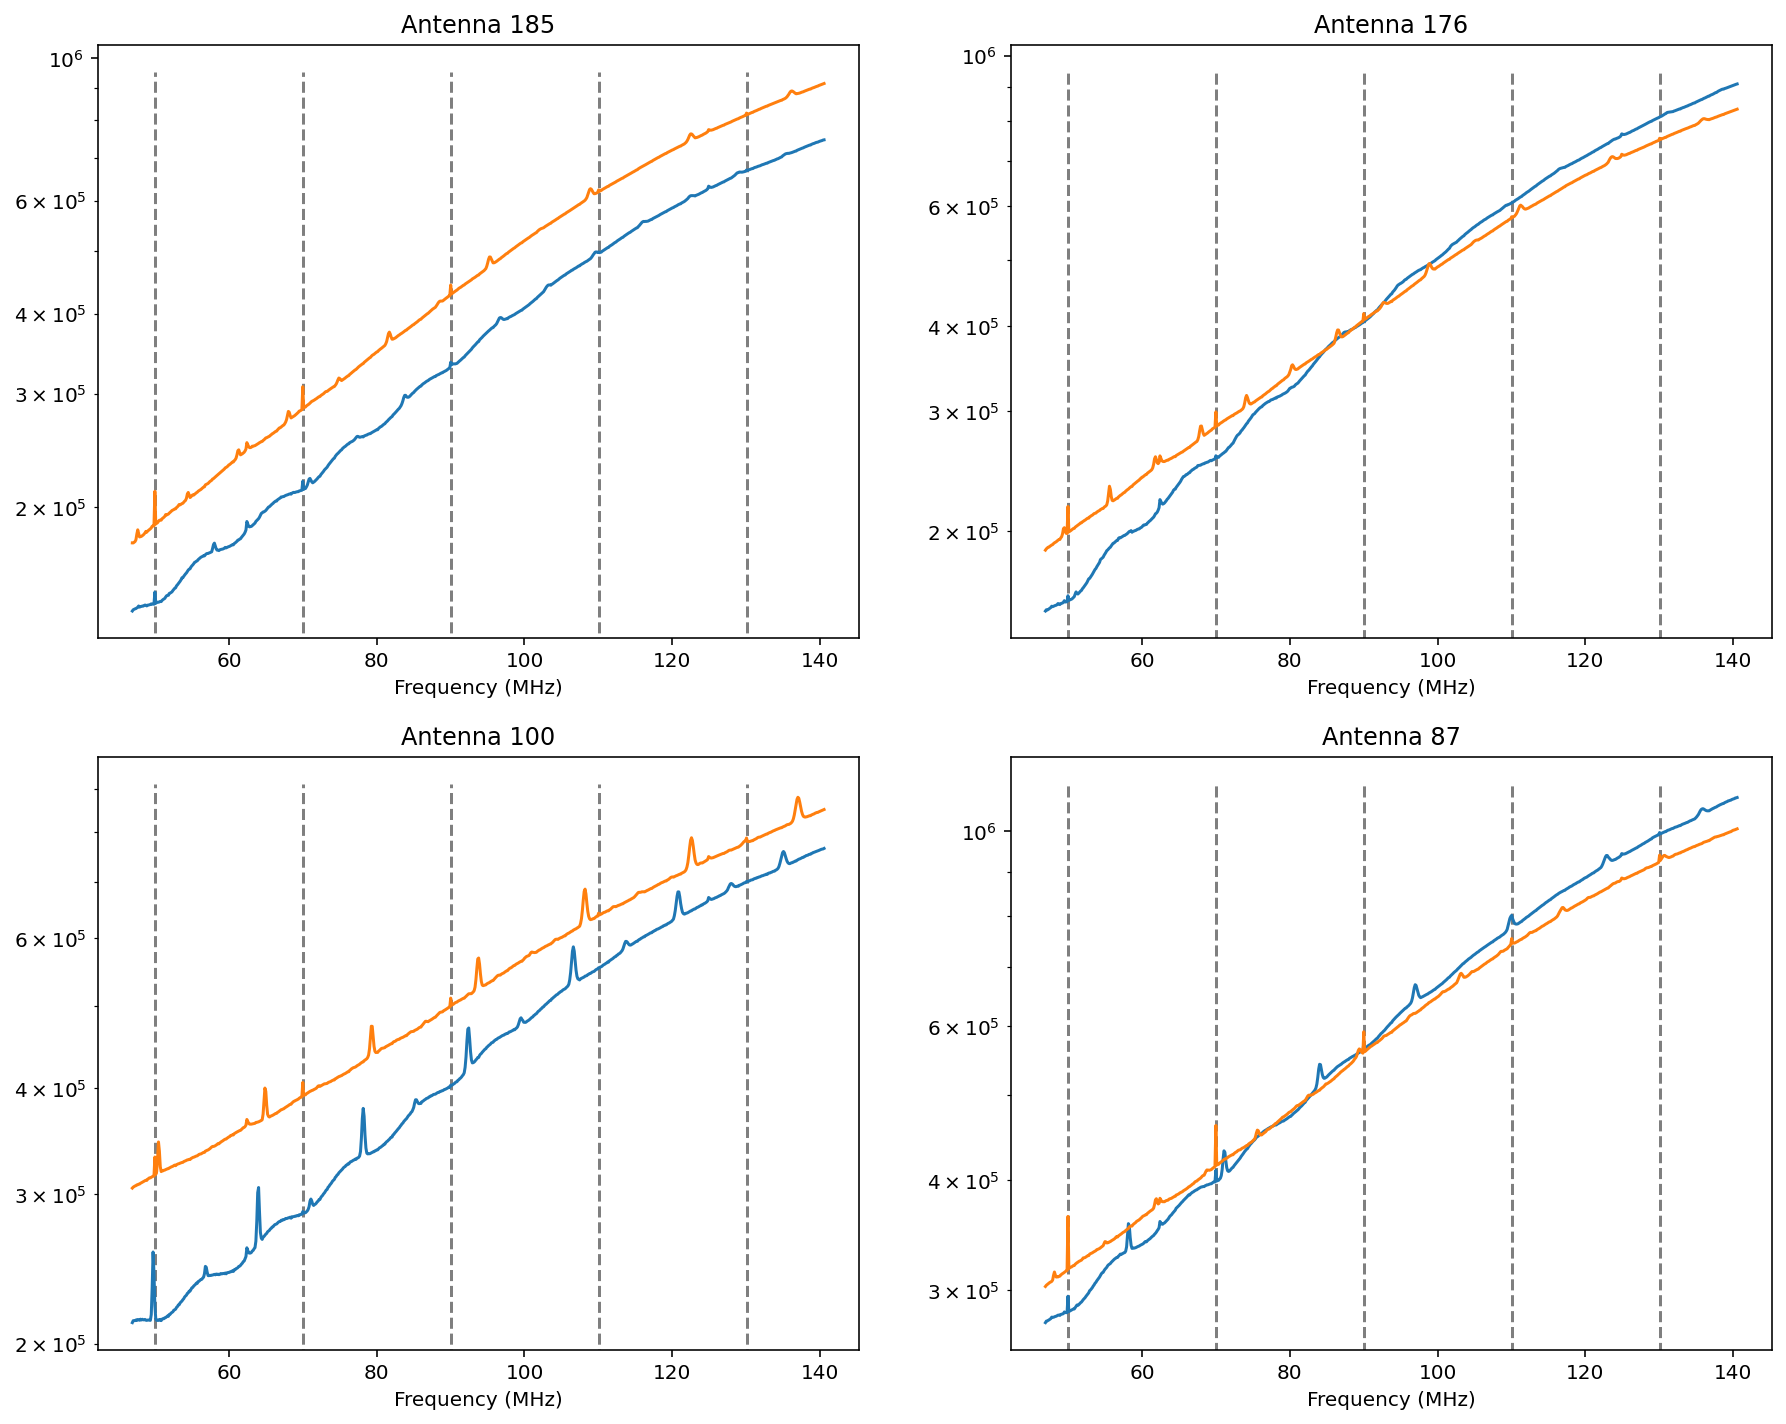

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [8]:
plot_four_noclocks_even(185, 176, 100, 87, 49.973, 20.025, 5)

[ 49.97253418  57.0526123   62.42370605  70.96862793  77.43835449
  83.90808105  90.01159668  96.72546387 103.31726074 109.66491699
 116.37878418]
[ 49.97253418  55.0994873   62.42370605  69.99206543  74.87487793
  81.71081543  90.01159668  95.26062012 108.93249512 124.92370605
 130.05065918]
Antenna185 xx and yy
[ 49.97253418  57.0526123   62.42370605  70.96862793  77.43835449
  83.90808105  90.01159668  96.72546387 103.31726074 109.66491699
 116.37878418]
[ 49.97253418  55.0994873   62.42370605  69.99206543  74.87487793
  81.71081543  90.01159668  95.26062012 108.93249512 124.92370605
 130.05065918]
Antenna176 xx and yy
[ 51.07116699  56.93054199  62.42370605  69.99206543  78.04870605
  87.81433105 109.29870605 117.11120605 124.92370605 138.59558105]
[ 49.97253418  55.58776855  62.42370605  68.03894043  74.14245605
  80.36804199  86.47155762  93.67370605  98.92272949 105.39245605
 111.25183105]
Antenna102 xx and yy
[ 49.97253418  60.10437012  68.28308105  73.41003418  80.00183105
  8

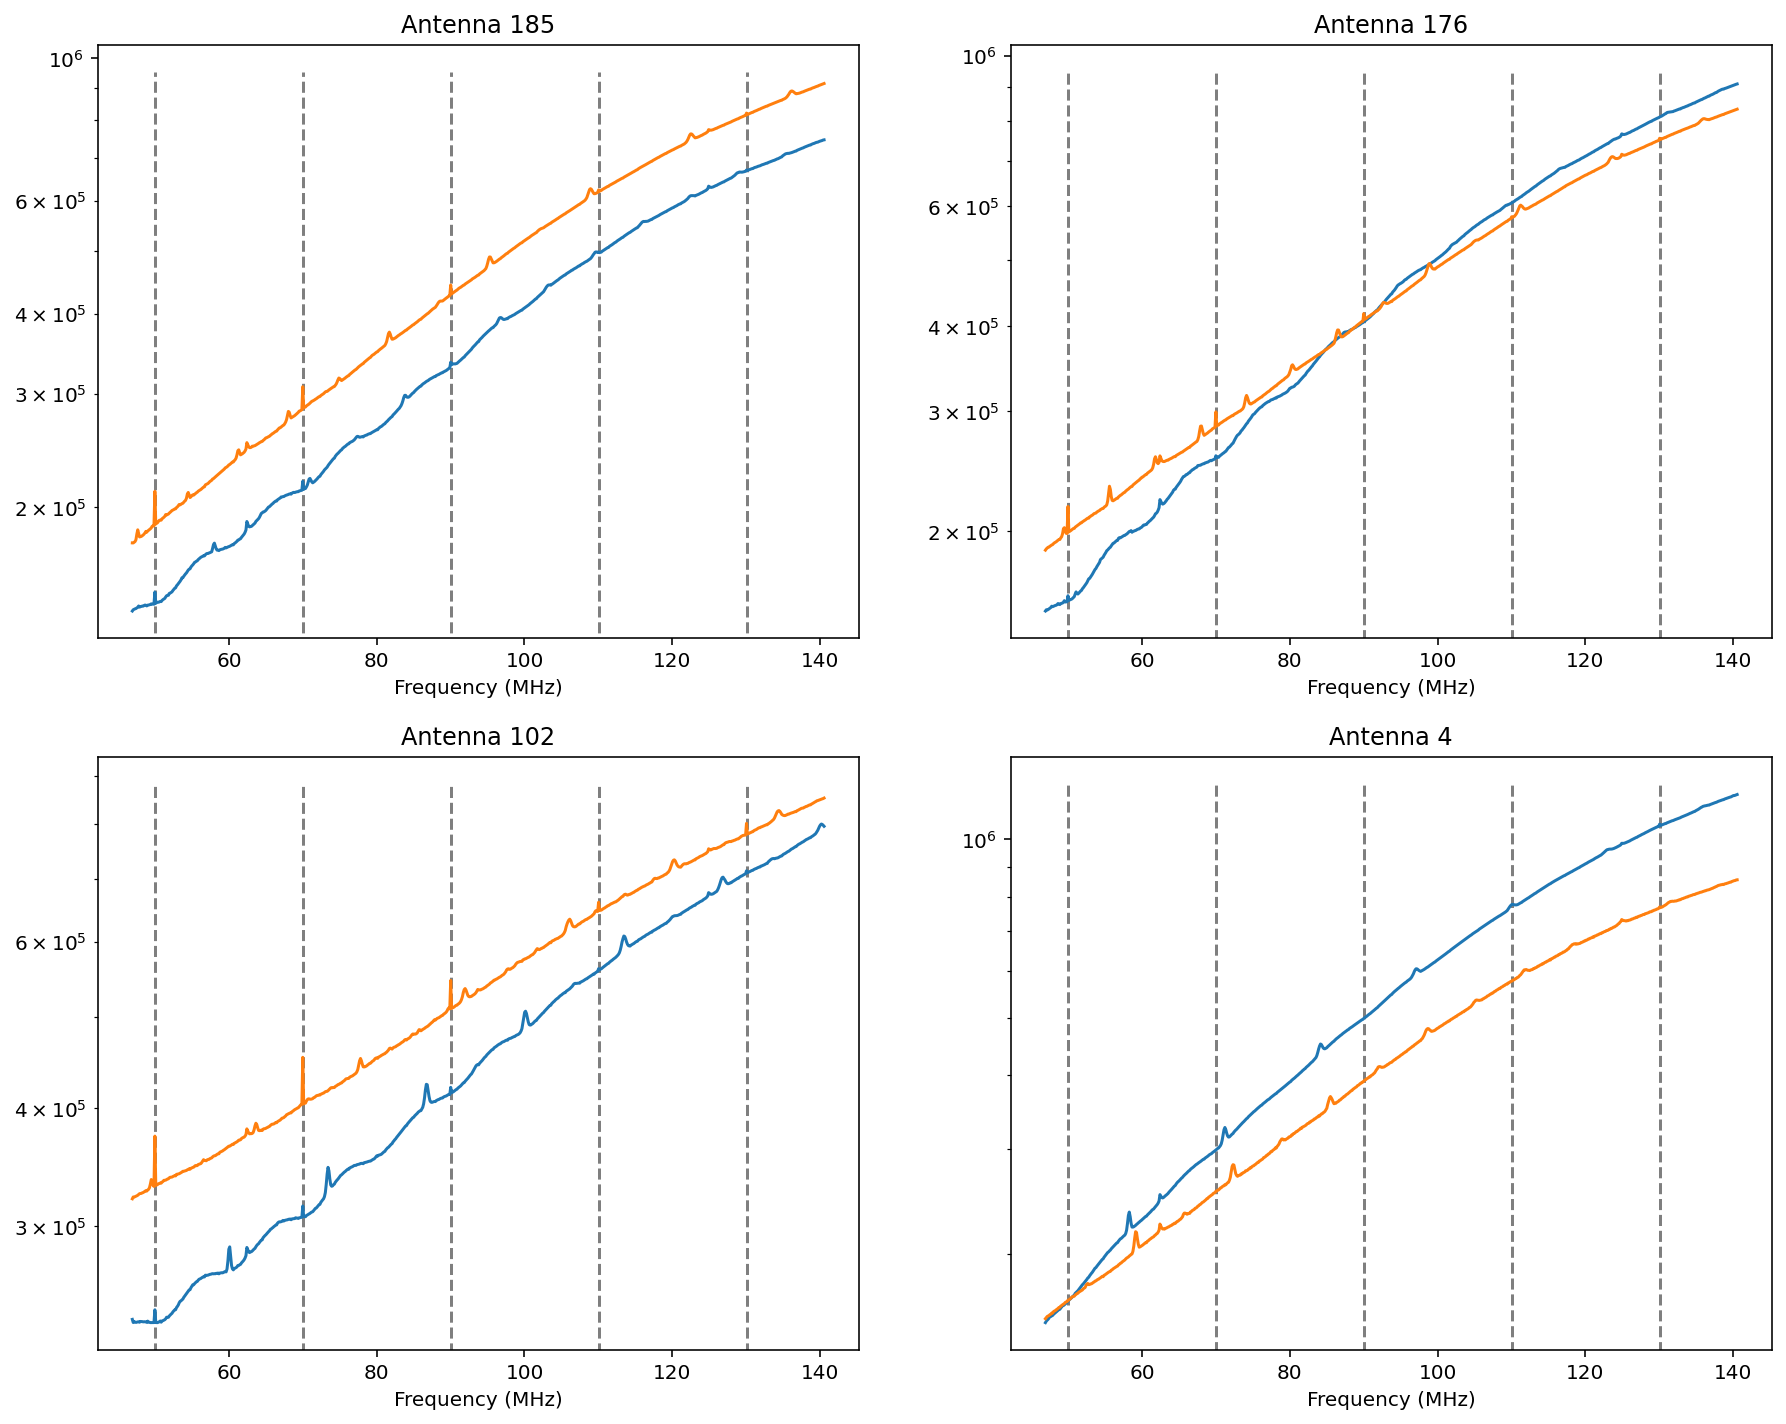

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [22]:
plot_four_noclocks_even(185, 176, 102, 4, 49.973, 20.025, 5)

[ 47.89733887  56.56433105  61.56921387  68.52722168  75.36315918
  82.19909668  89.03503418  95.87097168 102.70690918 109.66491699
 116.37878418]
[ 49.97253418  57.17468262  64.25476074  69.99206543  78.5369873
  85.73913574  92.81921387 102.21862793 110.27526855 118.5760498
 124.92370605]
Antenna14 xx and yy
[ 47.89733887  56.56433105  61.56921387  68.52722168  75.36315918
  82.19909668  89.03503418  95.87097168 102.70690918 109.66491699
 116.37878418]
[ 49.97253418  57.17468262  64.25476074  69.99206543  78.5369873
  85.73913574  92.81921387 102.21862793 110.27526855 118.5760498
 124.92370605]
Antenna39 xx and yy
[ 49.97253418  58.0291748   62.9119873   69.99206543  76.95007324
  81.95495605  90.86608887  98.43444824 106.12487793 116.13464355
 122.97058105]
[ 49.97253418  56.56433105  62.42370605  69.99206543  75.85144043
  82.68737793  90.01159668  95.74890137 106.12487793 124.92370605
 130.05065918]
Antenna25 xx and yy
[ 49.97253418  56.44226074  62.78991699  69.99206543  75.36315

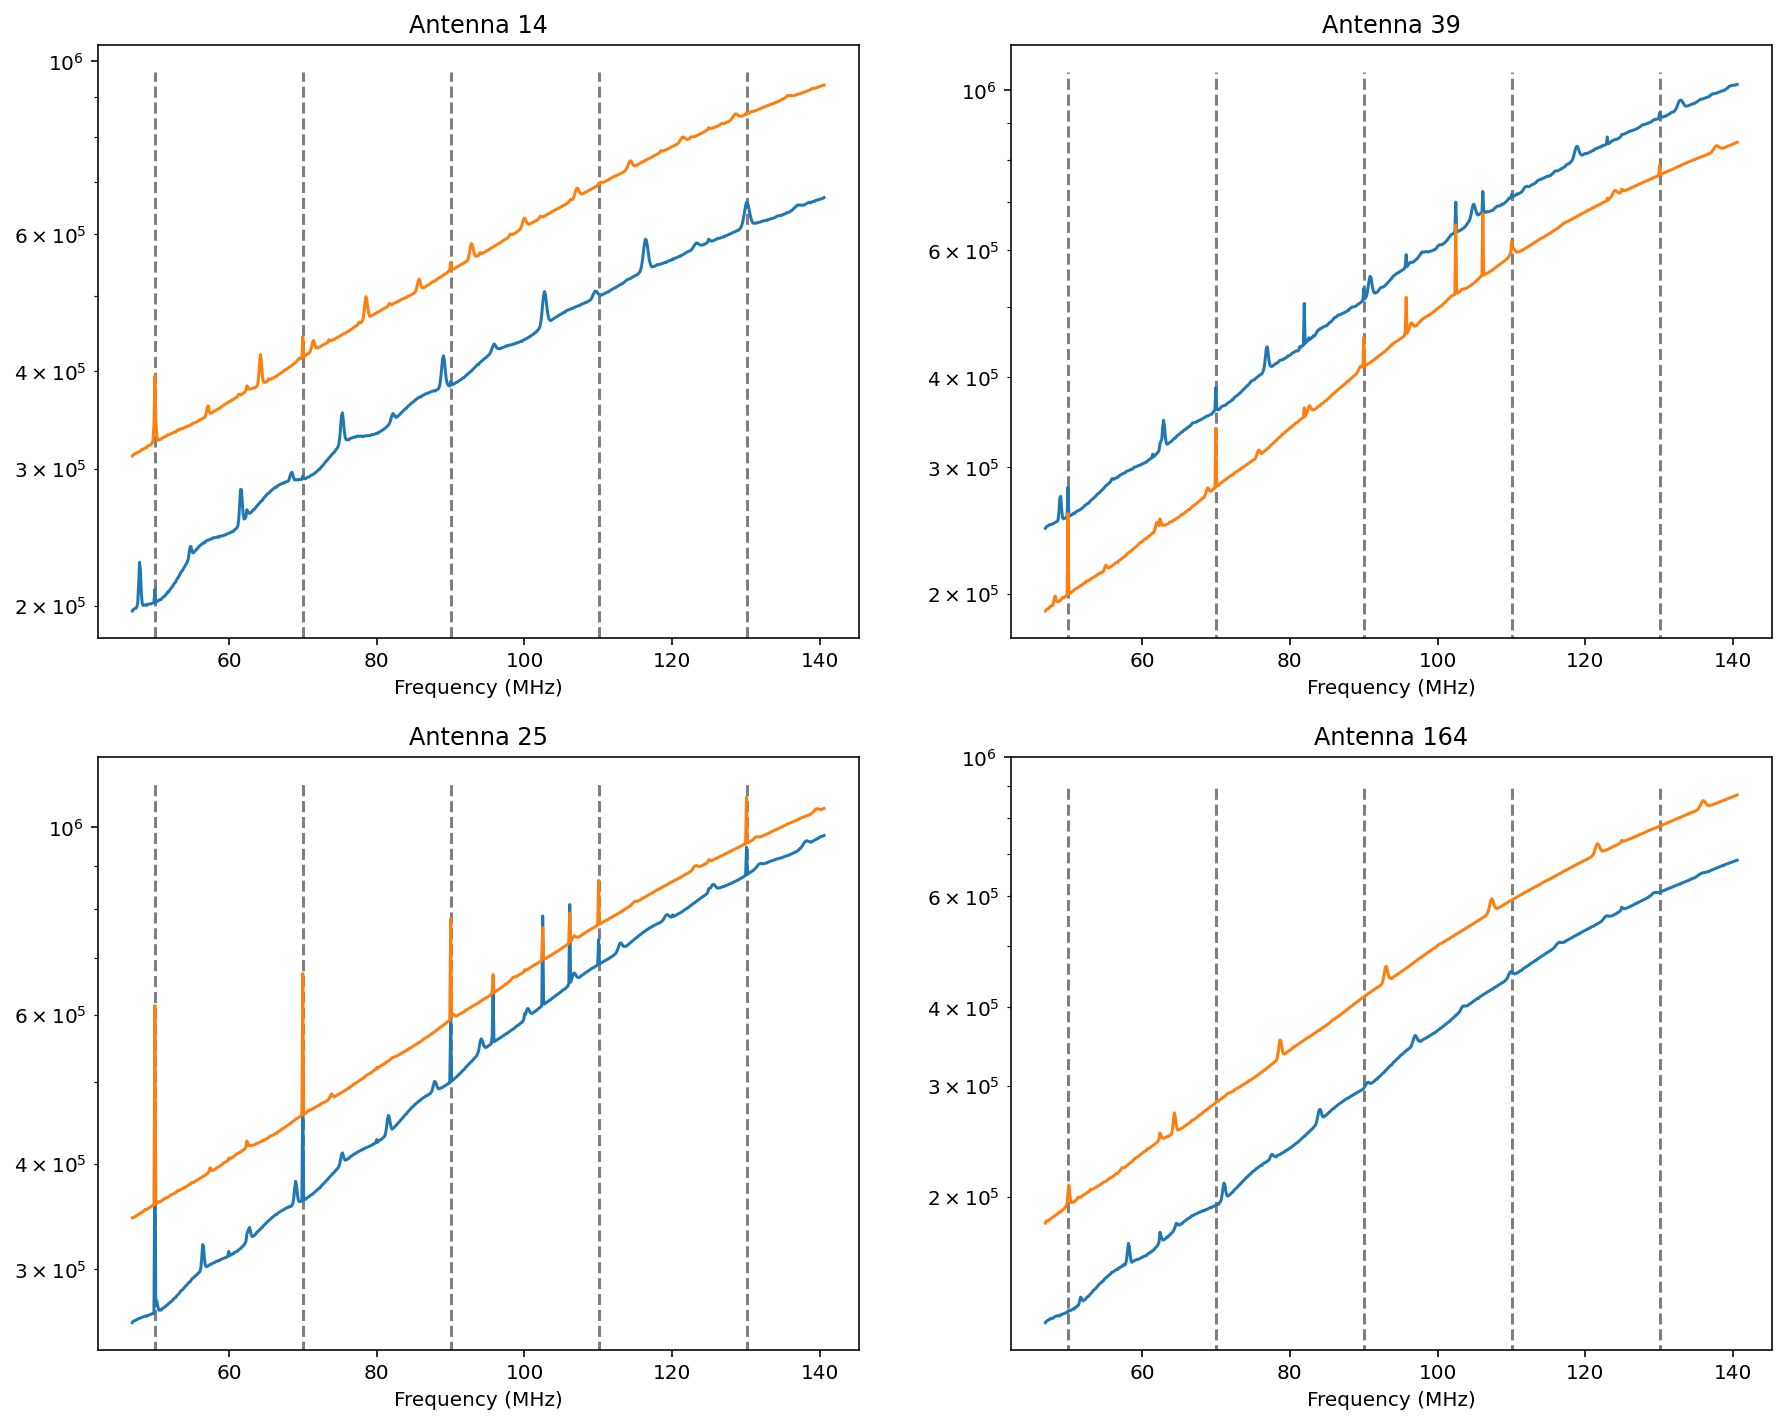

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [9]:
plot_four_noclocks_even(14, 39, 25, 164, 49.973, 20.025, 5)

[ 49.97253418  56.44226074  62.78991699  69.99206543  75.36315918
  81.58874512  90.01159668  95.74890137 106.12487793 112.96081543
 119.30847168]
[ 49.97253418  57.54089355  62.42370605  69.99206543  82.19909668
  90.01159668  95.74890137 102.46276855 110.03112793 115.15808105
 120.04089355]
Antenna25 xx and yy
[ 49.97253418  56.44226074  62.78991699  69.99206543  75.36315918
  81.58874512  90.01159668  95.74890137 106.12487793 112.96081543
 119.30847168]
[ 49.97253418  57.54089355  62.42370605  69.99206543  82.19909668
  90.01159668  95.74890137 102.46276855 110.03112793 115.15808105
 120.04089355]
Antenna39 xx and yy
[ 49.97253418  58.0291748   62.9119873   69.99206543  76.95007324
  81.95495605  90.86608887  98.43444824 106.12487793 116.13464355
 122.97058105]
[ 49.97253418  56.56433105  62.42370605  69.99206543  75.85144043
  82.68737793  90.01159668  95.74890137 106.12487793 124.92370605
 130.05065918]
Antenna23 xx and yy
[ 47.40905762  54.61120605  60.9588623   69.25964355  74.5

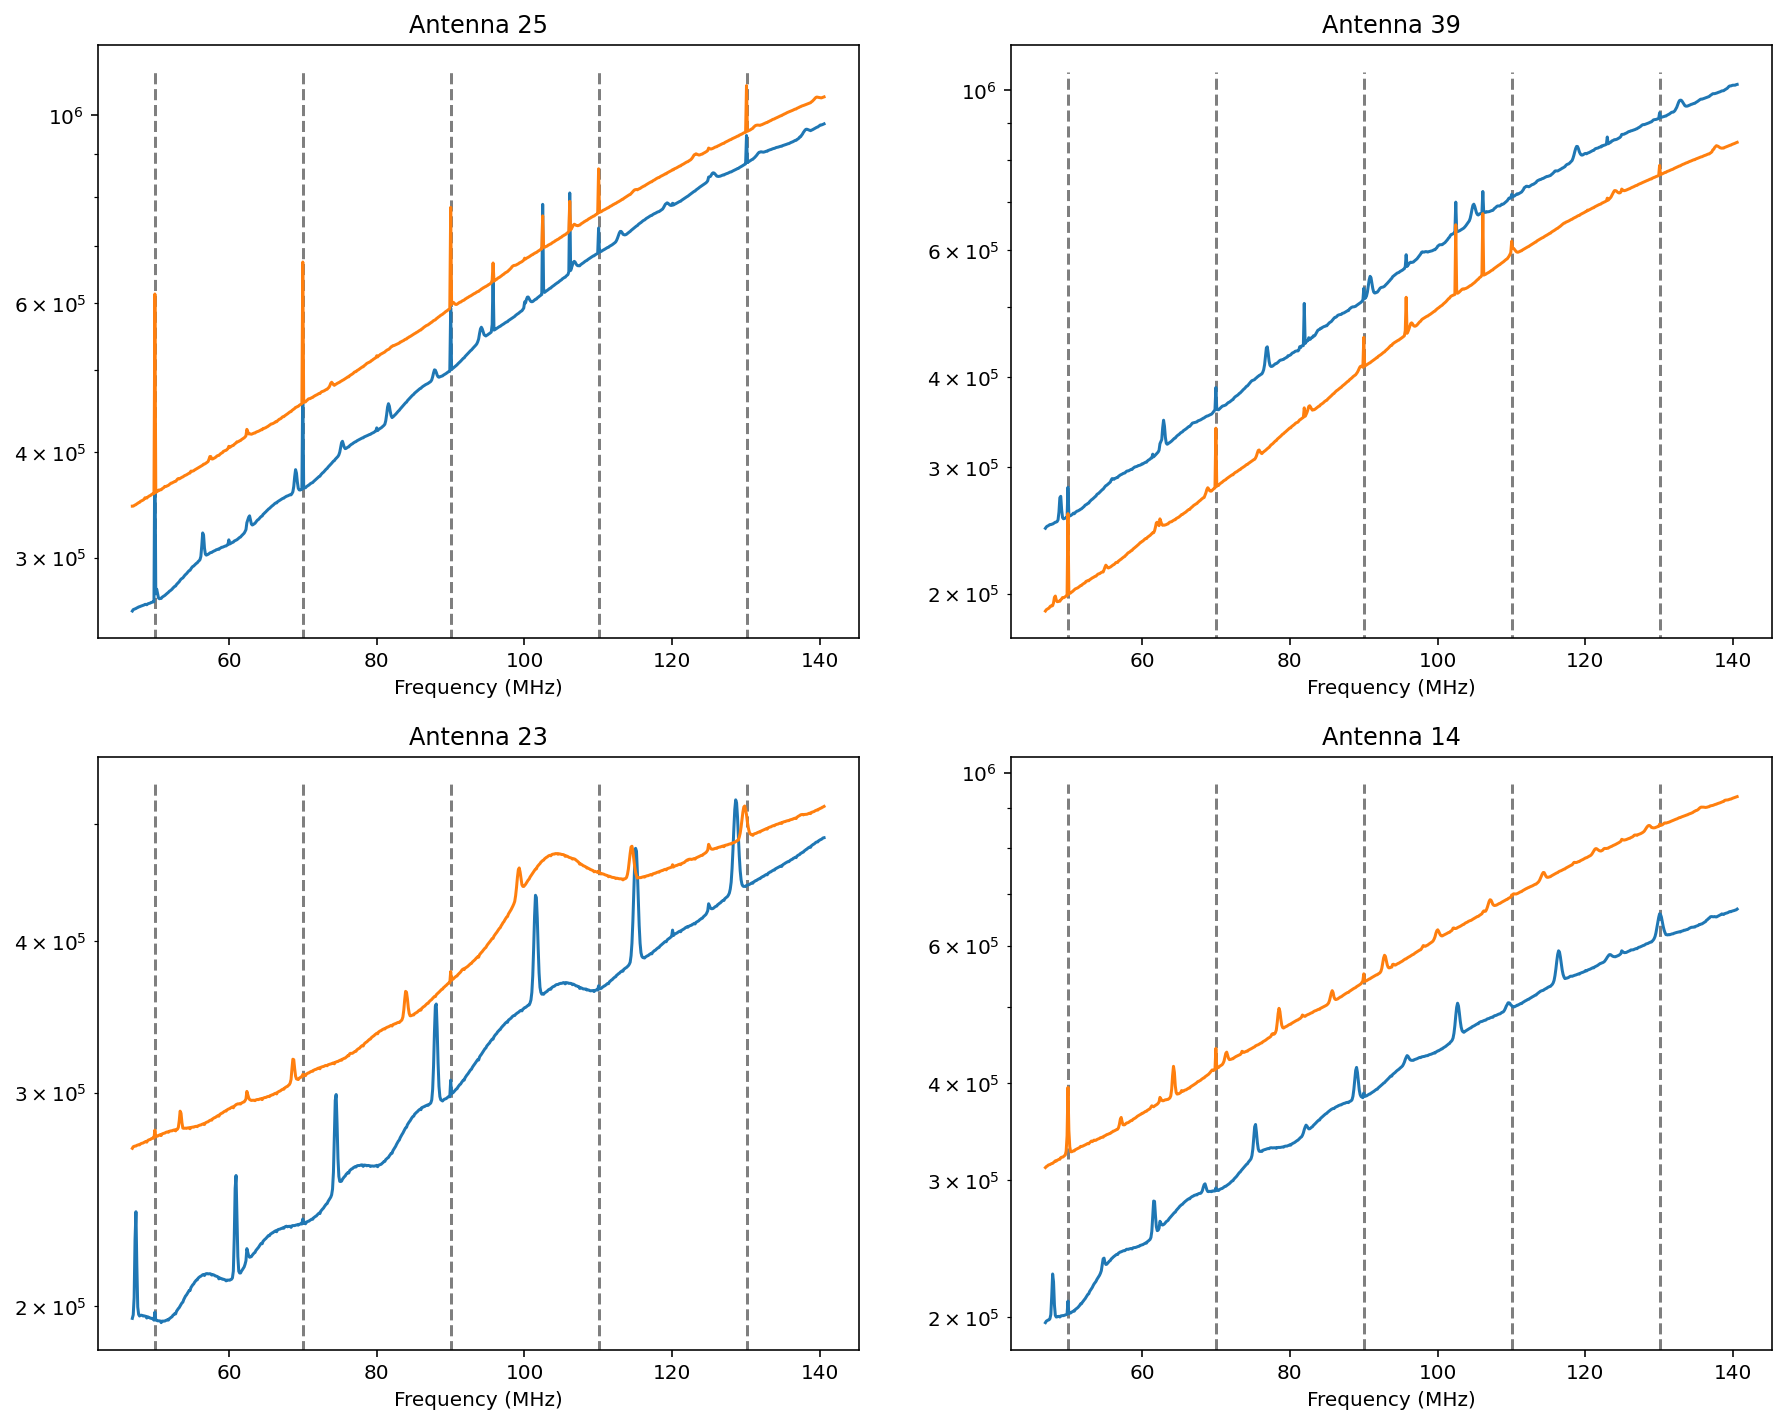

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [10]:
plot_four_noclocks_even(25, 39, 23, 14, 49.973, 20.025, 5)

[ 48.75183105  53.63464355  62.42370605  69.99206543  74.87487793
  82.32116699  89.76745605  97.33581543 104.78210449 112.47253418
 119.79675293]
[ 49.97253418  60.47058105  65.59753418  74.14245605  80.12390137
  87.57019043  94.77233887 102.21862793 109.29870605 117.11120605
 123.94714355]
Antenna3 xx and yy
[ 48.75183105  53.63464355  62.42370605  69.99206543  74.87487793
  82.32116699  89.76745605  97.33581543 104.78210449 112.47253418
 119.79675293]
[ 49.97253418  60.47058105  65.59753418  74.14245605  80.12390137
  87.57019043  94.77233887 102.21862793 109.29870605 117.11120605
 123.94714355]
Antenna5 xx and yy
[ 62.42370605  70.96862793  83.90808105  96.96960449 109.90905762
 122.84851074 135.66589355]
[ 47.04284668  53.75671387  60.47058105  67.18444824  73.89831543
  80.61218262  87.3260498   94.03991699 100.75378418 107.58972168
 114.42565918]
Antenna4 xx and yy
[ 47.53112793  62.42370605  71.21276855  84.15222168  97.0916748
 110.15319824 124.92370605 130.05065918 140.06042

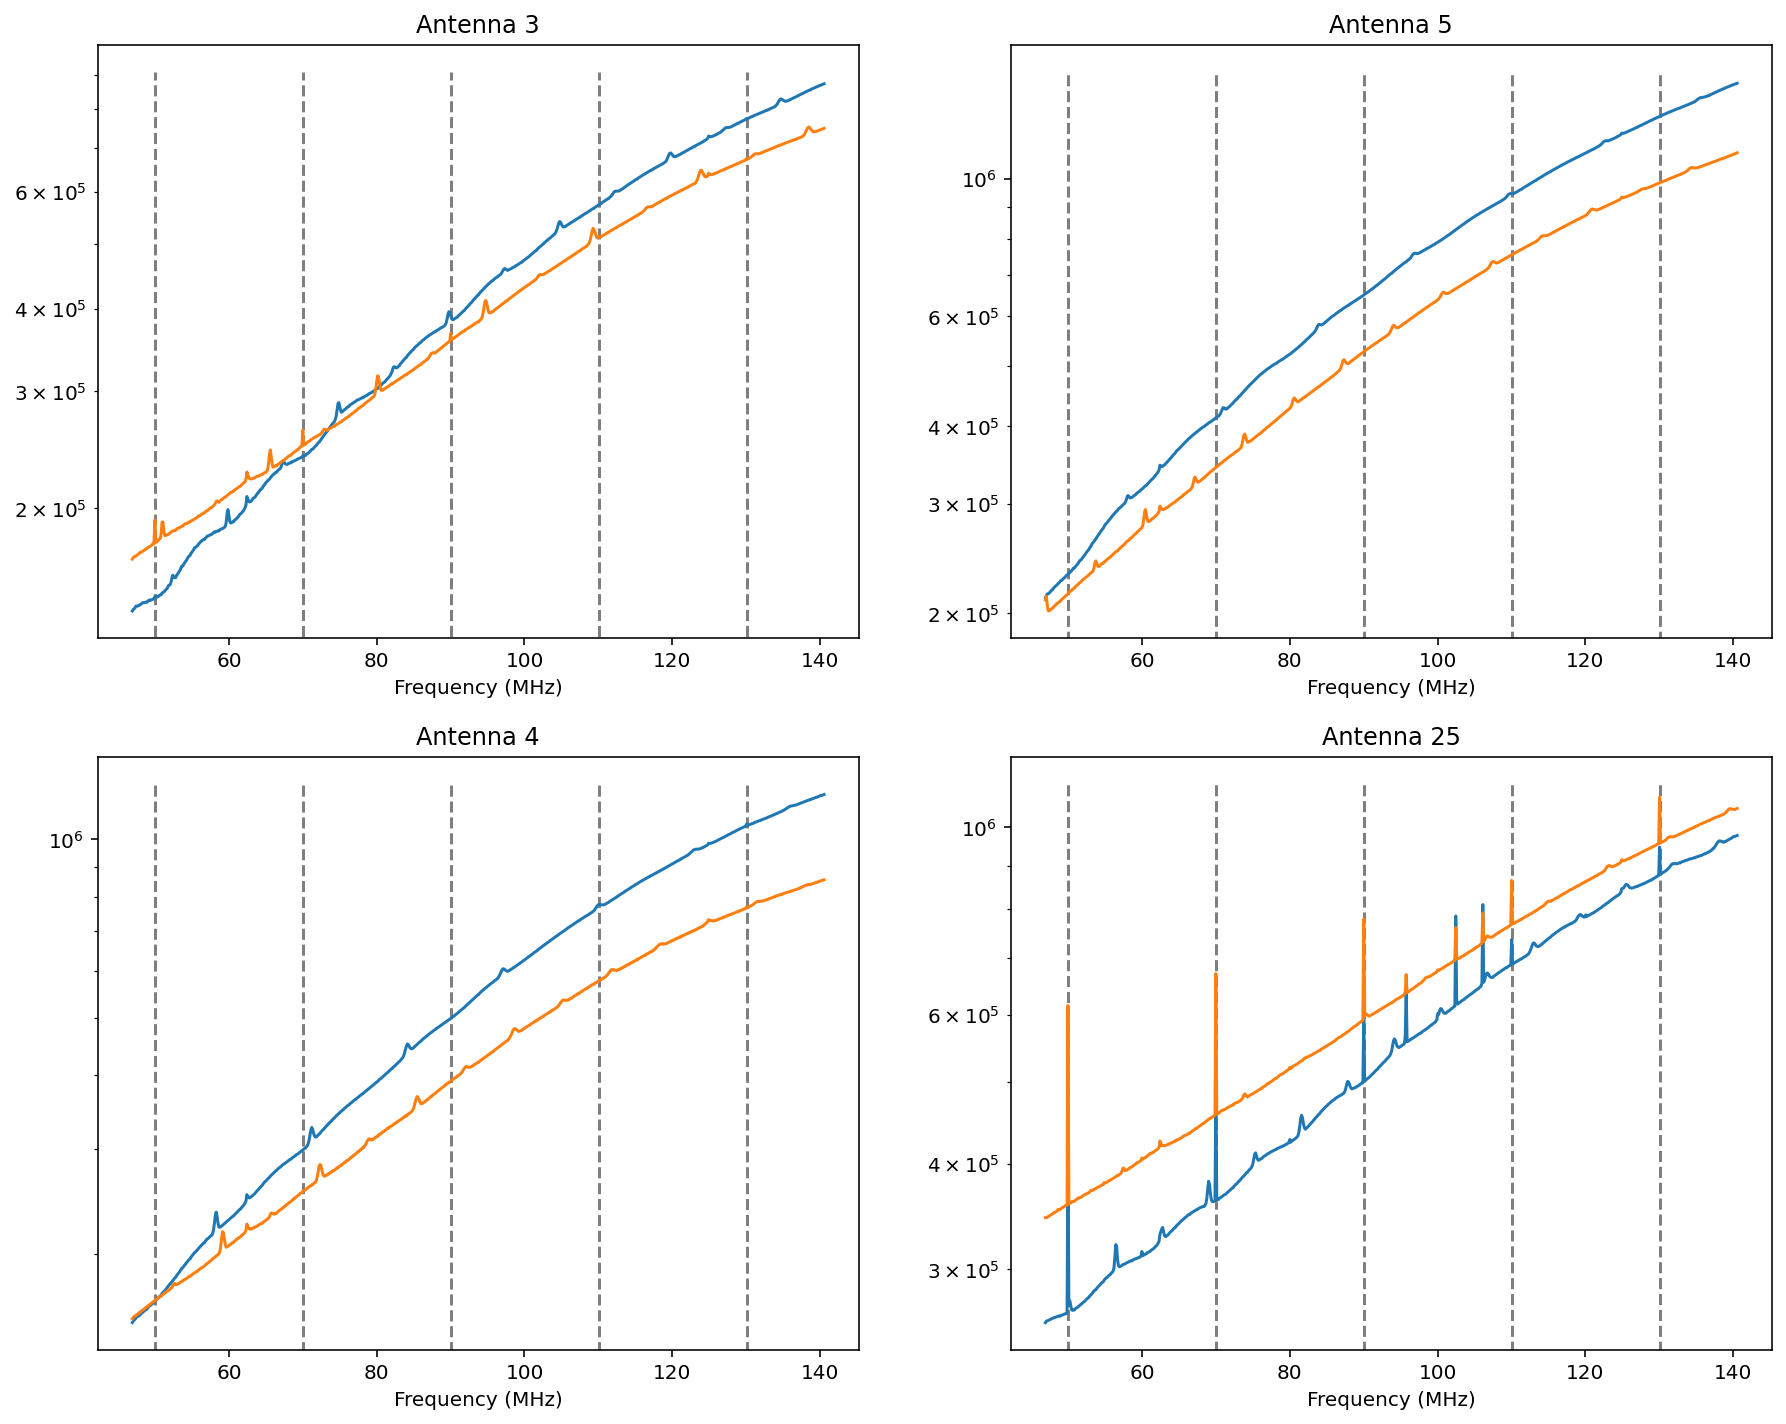

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [11]:
plot_four_noclocks_even(3, 5, 4, 25, 49.973, 20.025, 5)

[ 50.82702637  57.17468262  63.64440918  69.86999512  76.33972168
  82.68737793  89.03503418  95.38269043 101.73034668 108.07800293
 114.42565918]
[ 51.07116699  56.56433105  64.13269043  72.18933105  80.24597168
  96.23718262 112.22839355 128.21960449]
Antenna46 xx and yy
[ 50.82702637  57.17468262  63.64440918  69.86999512  76.33972168
  82.68737793  89.03503418  95.38269043 101.73034668 108.07800293
 114.42565918]
[ 51.07116699  56.56433105  64.13269043  72.18933105  80.24597168
  96.23718262 112.22839355 128.21960449]
Antenna45 xx and yy
[ 48.62976074  54.73327637  60.71472168  66.8182373   72.92175293
  79.02526855  85.12878418  91.11022949  97.21374512 103.31726074
 109.29870605]
[ 48.01940918  54.85534668  61.69128418  68.52722168  75.48522949
  82.32116699  89.15710449  95.99304199 109.66491699 123.4588623
 137.1307373 ]
Antenna73 xx and yy
[ 49.2401123   55.46569824  62.42370605  67.7947998   74.02038574
  80.00183105  86.22741699  92.57507324  98.55651855 110.88562012
 119.06

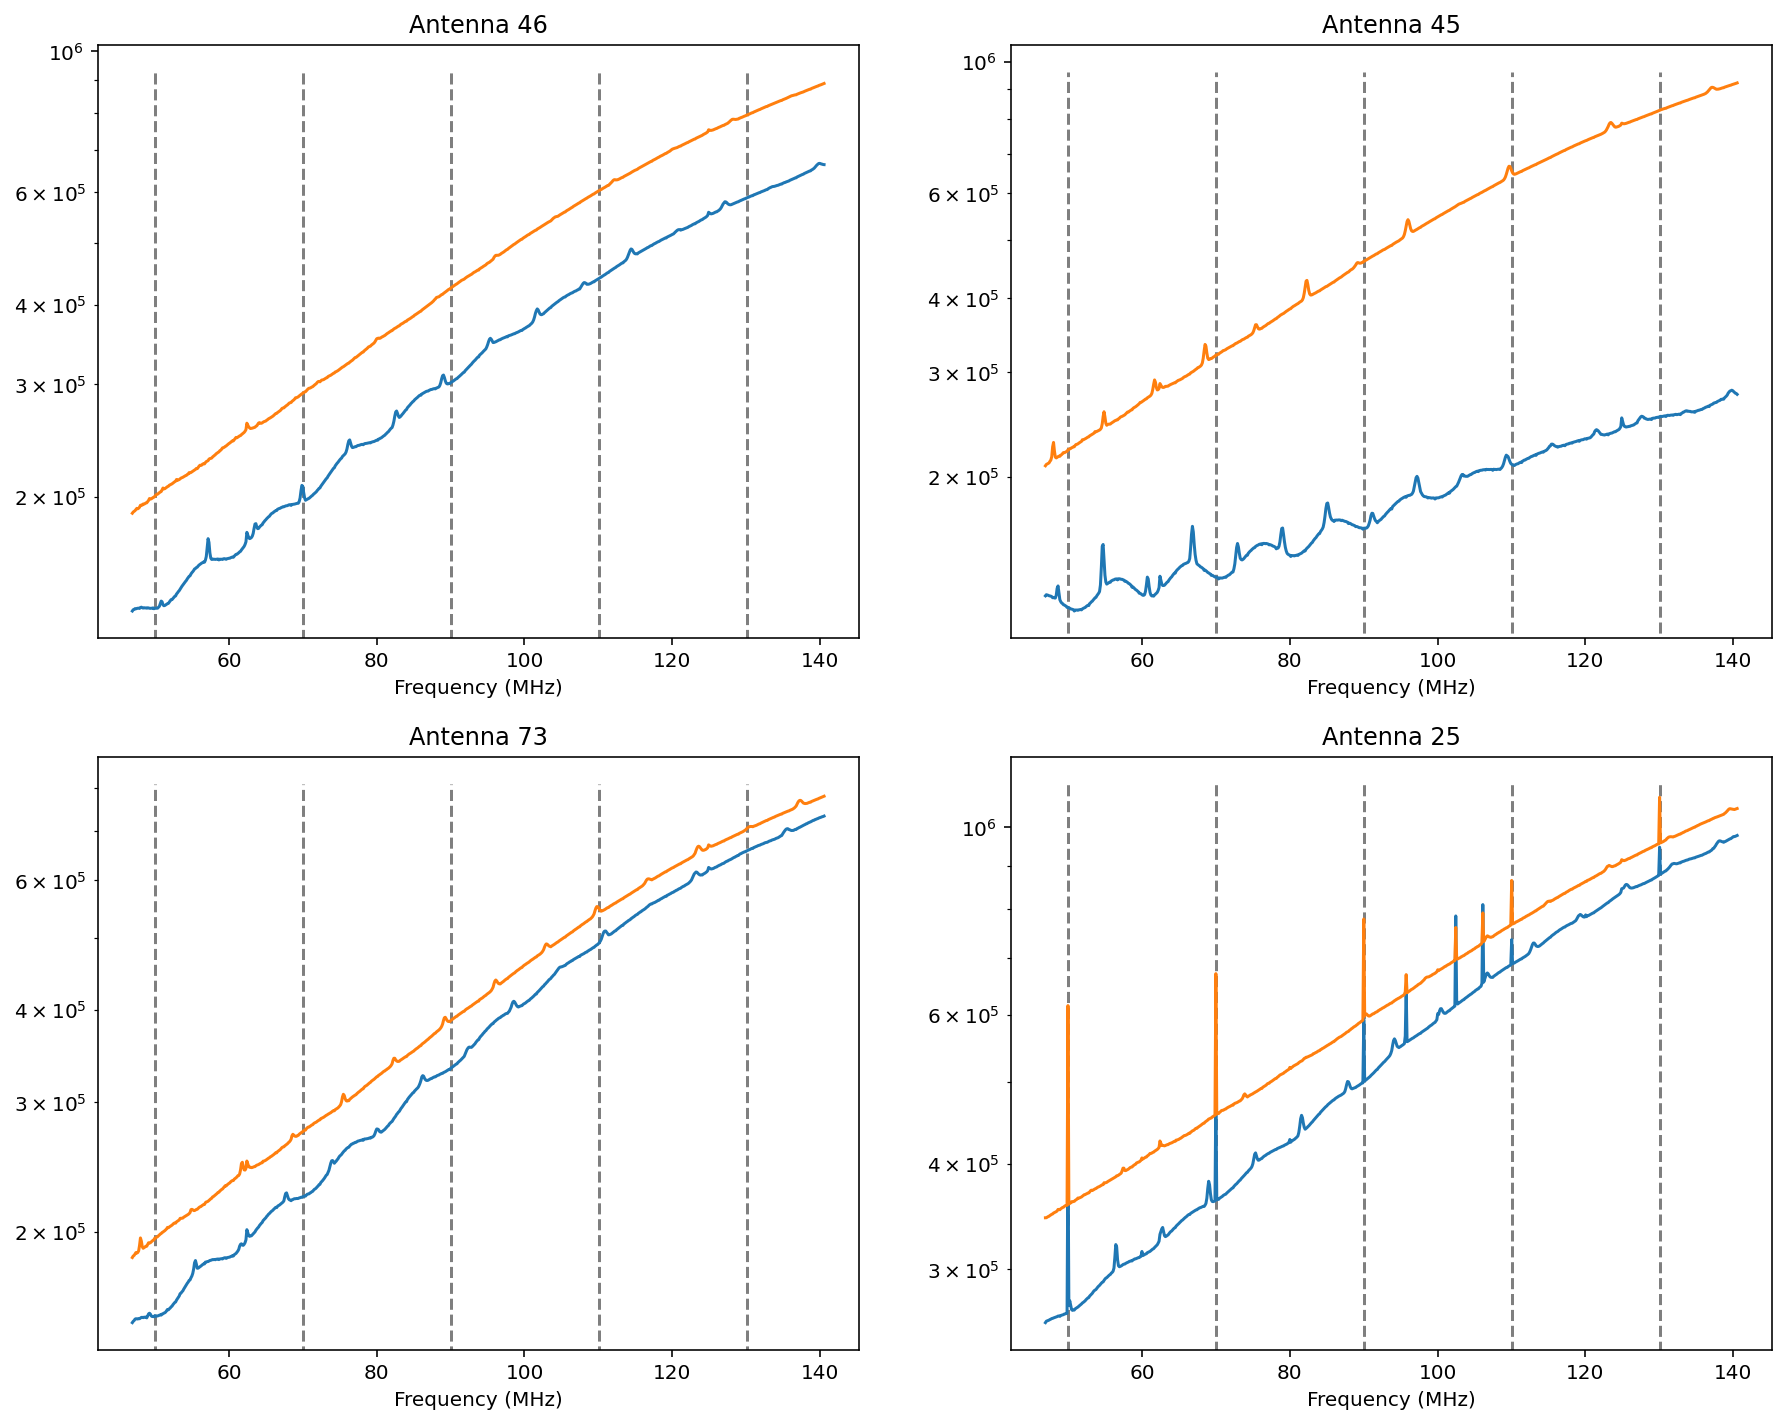

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [12]:
plot_four_noclocks_even(46, 45, 73, 25, 49.973, 20.025, 5)

[ 48.2635498   56.56433105  62.17956543  70.23620605  75.97351074
  89.76745605  97.57995605 103.56140137 117.35534668 124.92370605
 131.14929199]
[ 54.00085449  59.37194824  65.96374512  72.55554199  79.14733887
  85.73913574  92.33093262  98.92272949 105.51452637 113.57116699
 118.69812012]
Antenna138 xx and yy
[ 48.2635498   56.56433105  62.17956543  70.23620605  75.97351074
  89.76745605  97.57995605 103.56140137 117.35534668 124.92370605
 131.14929199]
[ 54.00085449  59.37194824  65.96374512  72.55554199  79.14733887
  85.73913574  92.33093262  98.92272949 105.51452637 113.57116699
 118.69812012]
Antenna117 xx and yy
[ 48.62976074  56.56433105  62.66784668  69.50378418  76.46179199
  83.54187012  90.37780762  97.45788574 104.29382324 111.25183105
 118.33190918]
[ 50.46081543  57.78503418  64.98718262  72.18933105  79.39147949
  86.59362793  93.79577637 100.9979248  108.20007324 115.40222168
 124.92370605]
Antenna82 xx and yy
[ 51.31530762  58.63952637  66.08581543  73.28796387  88

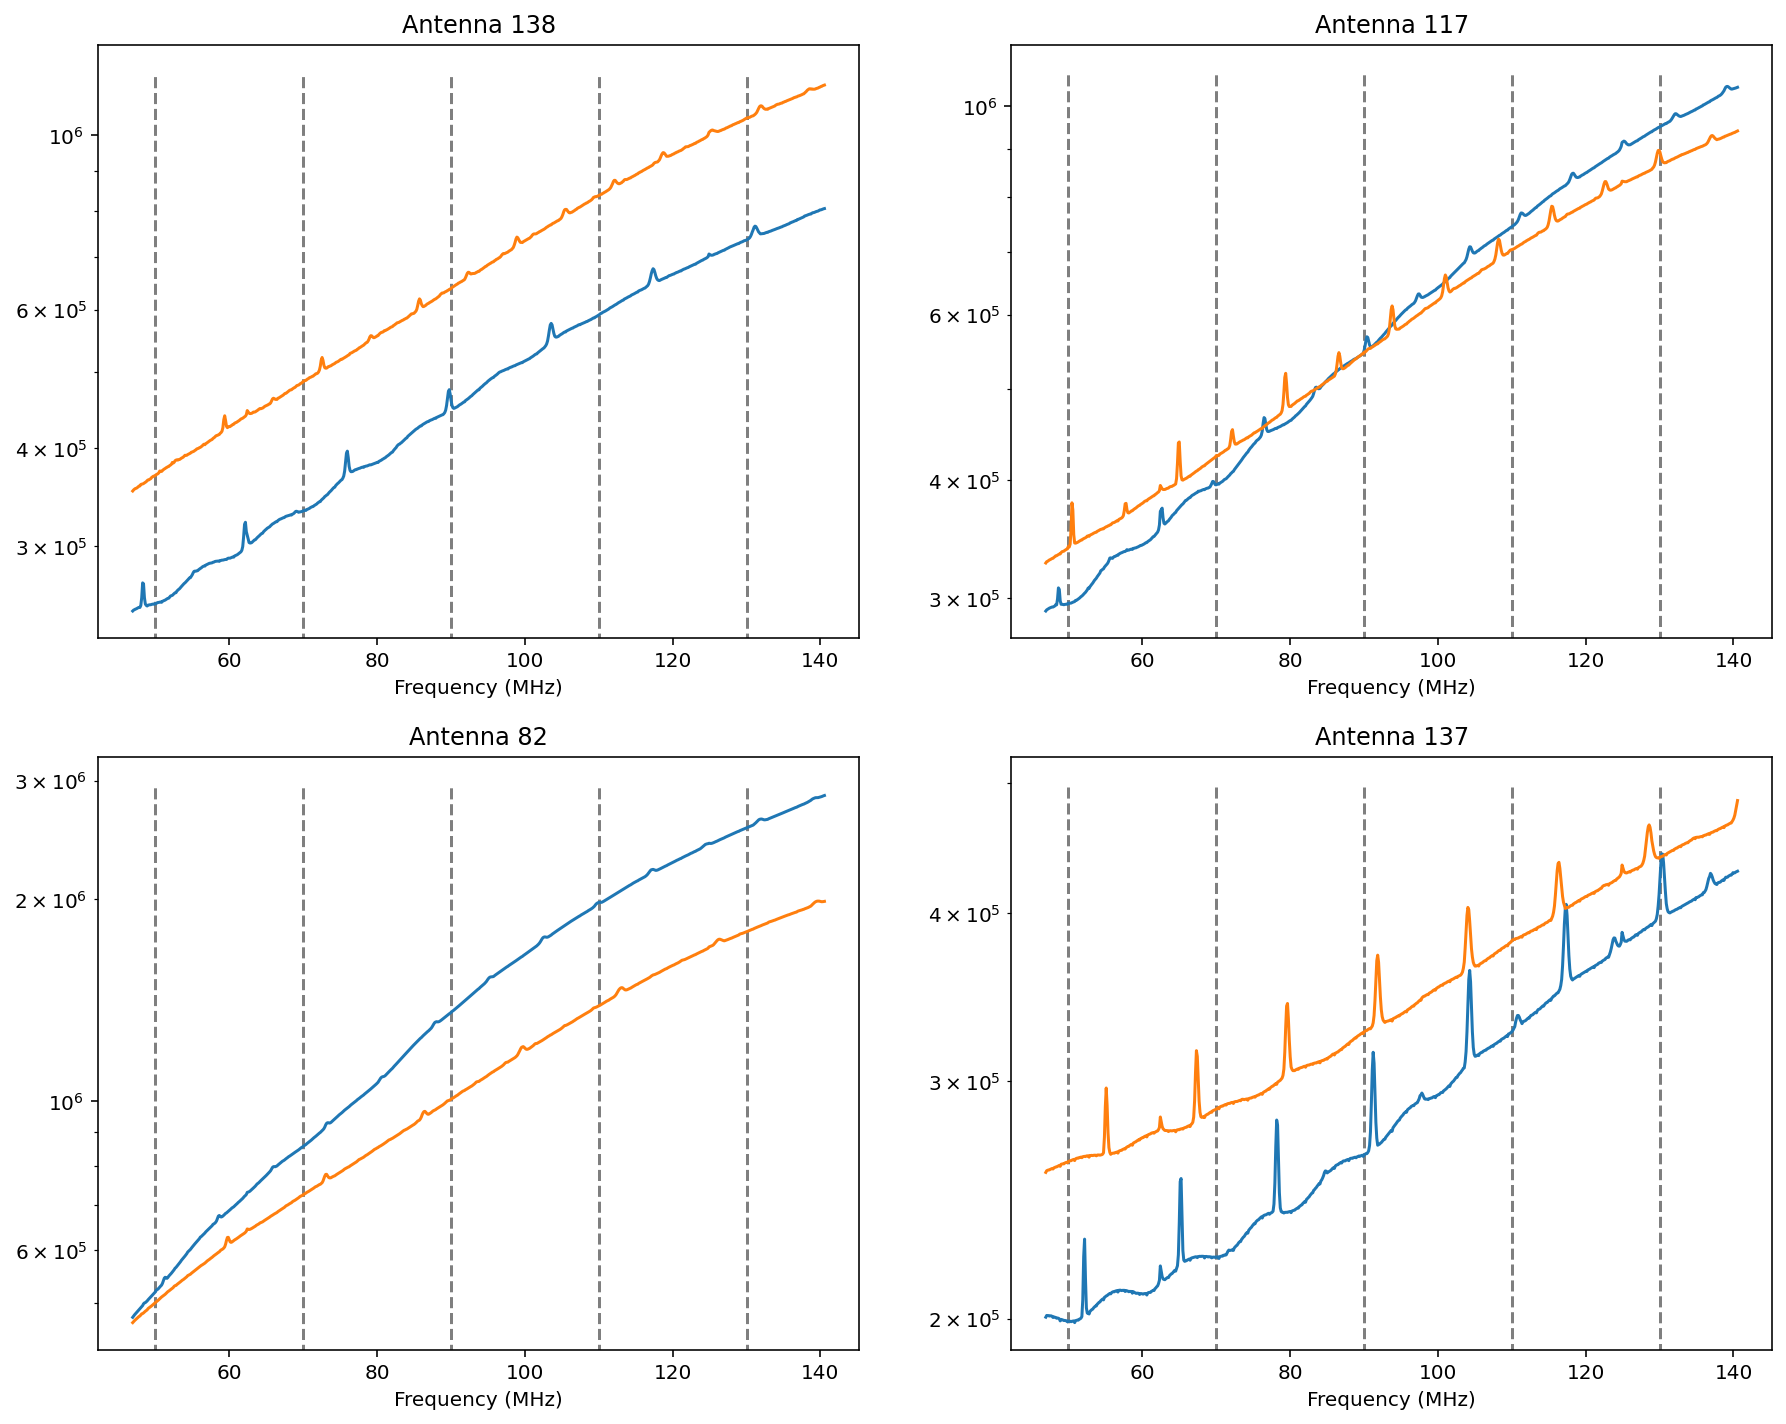

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [13]:
plot_four_noclocks_even(138, 117, 82, 137, 49.973, 20.025, 5)

[ 51.55944824  59.0057373   66.32995605  73.77624512  81.10046387
  88.42468262  95.87097168 103.19519043 110.51940918 117.96569824
 125.28991699]
[ 51.1932373   59.37194824  64.37683105  72.55554199  85.73913574
 103.43933105 112.22839355 125.28991699 138.59558105]
Antenna86 xx and yy
[ 51.55944824  59.0057373   66.32995605  73.77624512  81.10046387
  88.42468262  95.87097168 103.19519043 110.51940918 117.96569824
 125.28991699]
[ 51.1932373   59.37194824  64.37683105  72.55554199  85.73913574
 103.43933105 112.22839355 125.28991699 138.59558105]
Antenna120 xx and yy
[ 52.41394043  57.54089355  62.42370605  68.28308105  74.87487793
  82.4432373   90.01159668  97.33581543 104.9041748  112.47253418
 119.79675293]
[ 48.75183105  53.63464355  60.34851074  67.06237793  73.77624512
  80.4901123   87.20397949  93.91784668 100.75378418 107.34558105
 114.18151855]
Antenna85 xx and yy
[ 50.33874512  57.54089355  64.74304199  71.94519043  79.02526855
  86.3494873   93.42956543 107.8338623  115.1

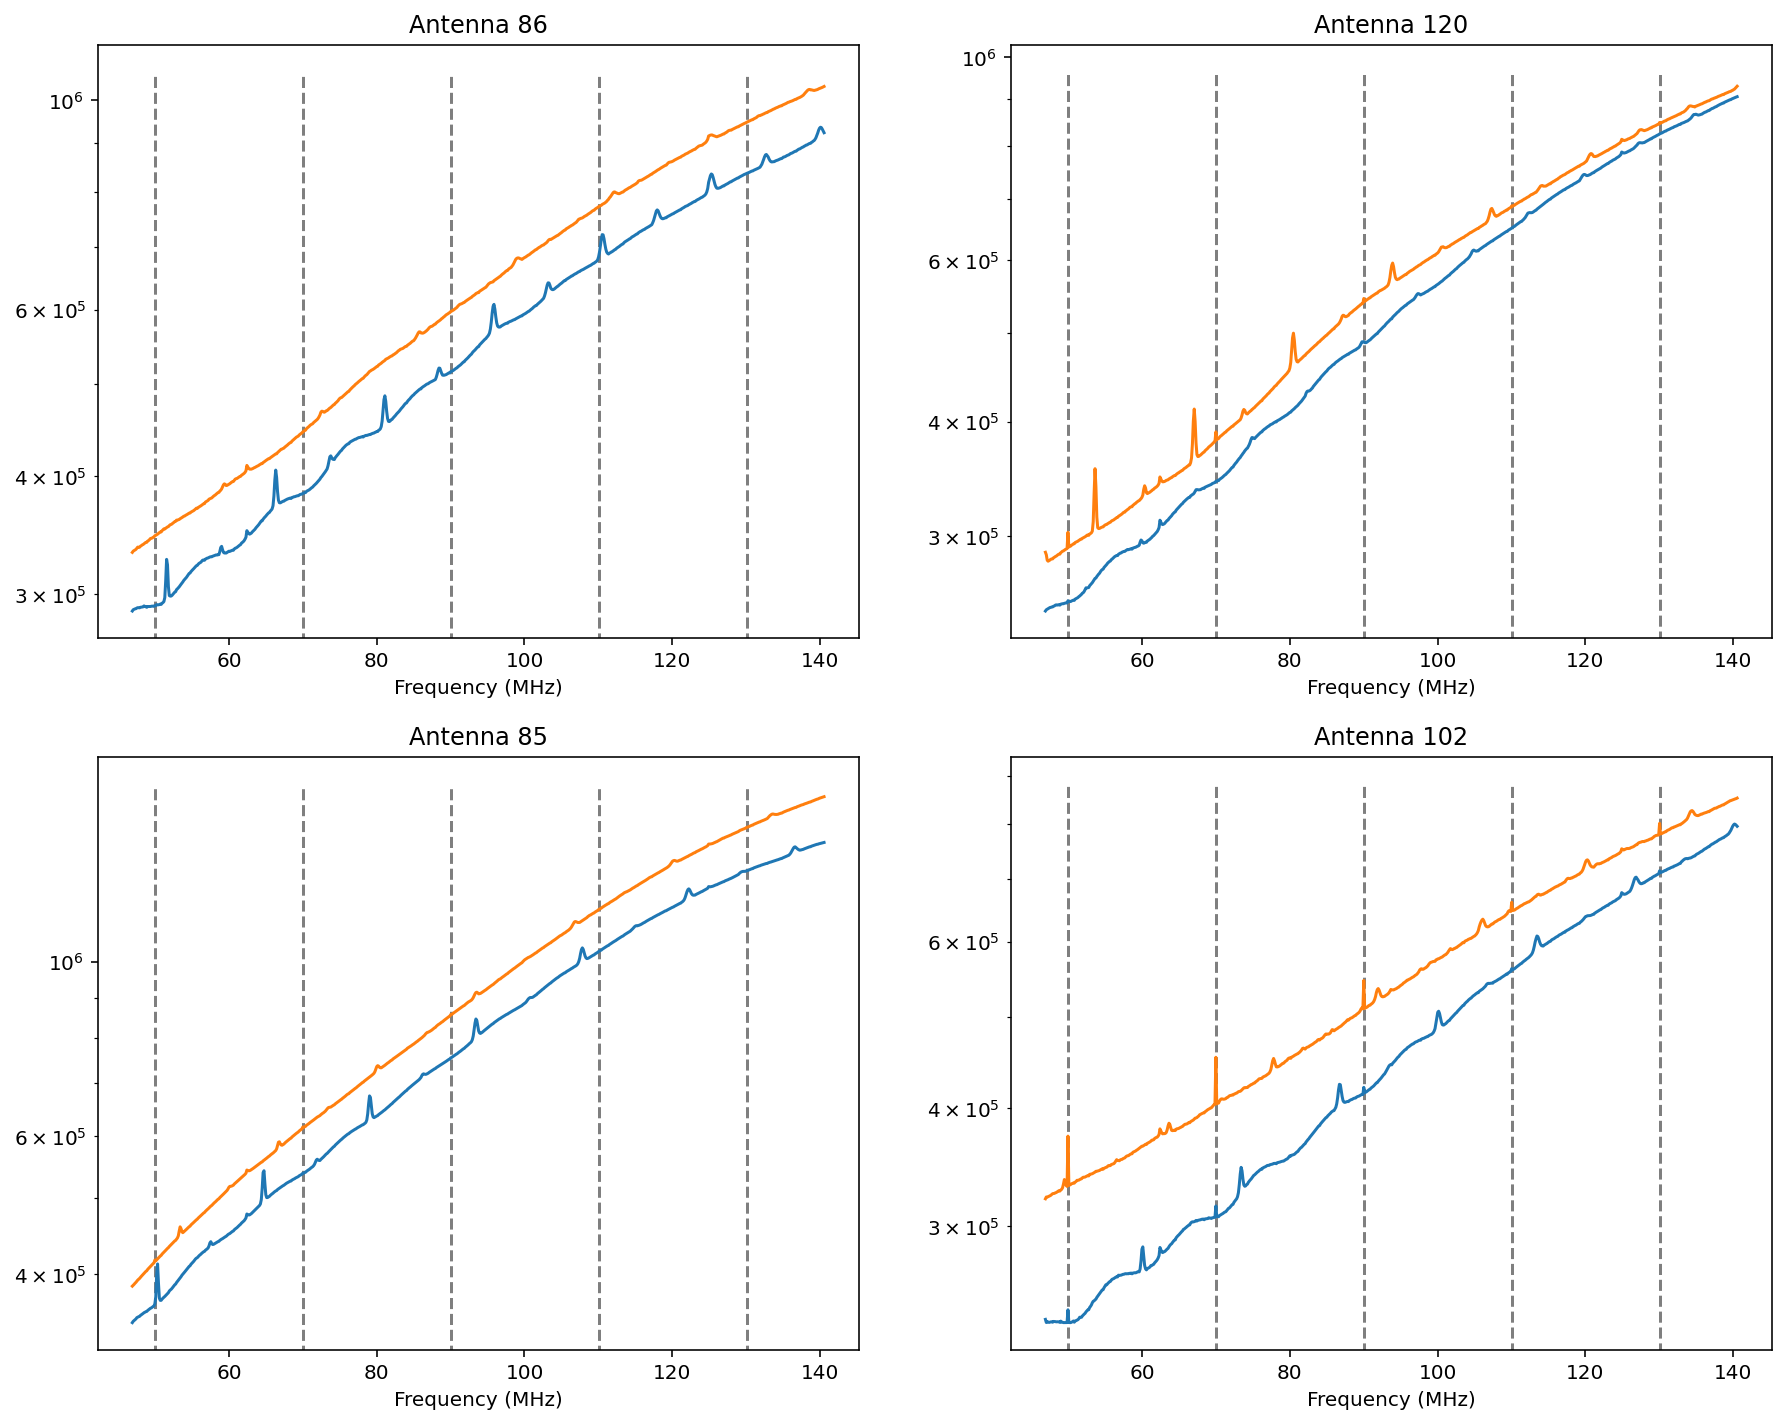

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [14]:
plot_four_noclocks_even(86, 120, 85, 102, 49.973, 20.025, 5)

[ 48.01940918  56.56433105  62.42370605  70.60241699  79.5135498
  87.81433105  96.35925293 109.17663574 121.99401855 128.82995605
 134.68933105]
[ 49.36218262  54.61120605  60.47058105  66.32995605  72.55554199
  78.04870605  85.73913574  91.72058105  99.0447998  112.10632324
 121.01745605]
Antenna112 xx and yy
[ 48.01940918  56.56433105  62.42370605  70.60241699  79.5135498
  87.81433105  96.35925293 109.17663574 121.99401855 128.82995605
 134.68933105]
[ 49.36218262  54.61120605  60.47058105  66.32995605  72.55554199
  78.04870605  85.73913574  91.72058105  99.0447998  112.10632324
 121.01745605]
Antenna128 xx and yy
[ 50.94909668  56.93054199  62.42370605  67.30651855  74.87487793
  82.32116699  89.76745605  97.21374512 104.78210449 112.22839355
 119.79675293]
[ 48.14147949  54.85534668  59.73815918  66.57409668  73.04382324
  79.75769043  86.3494873   93.67370605  99.65515137 106.36901855
 112.96081543]
Antenna92 xx and yy
[ 48.87390137  62.9119873   76.95007324  90.86608887 104.9

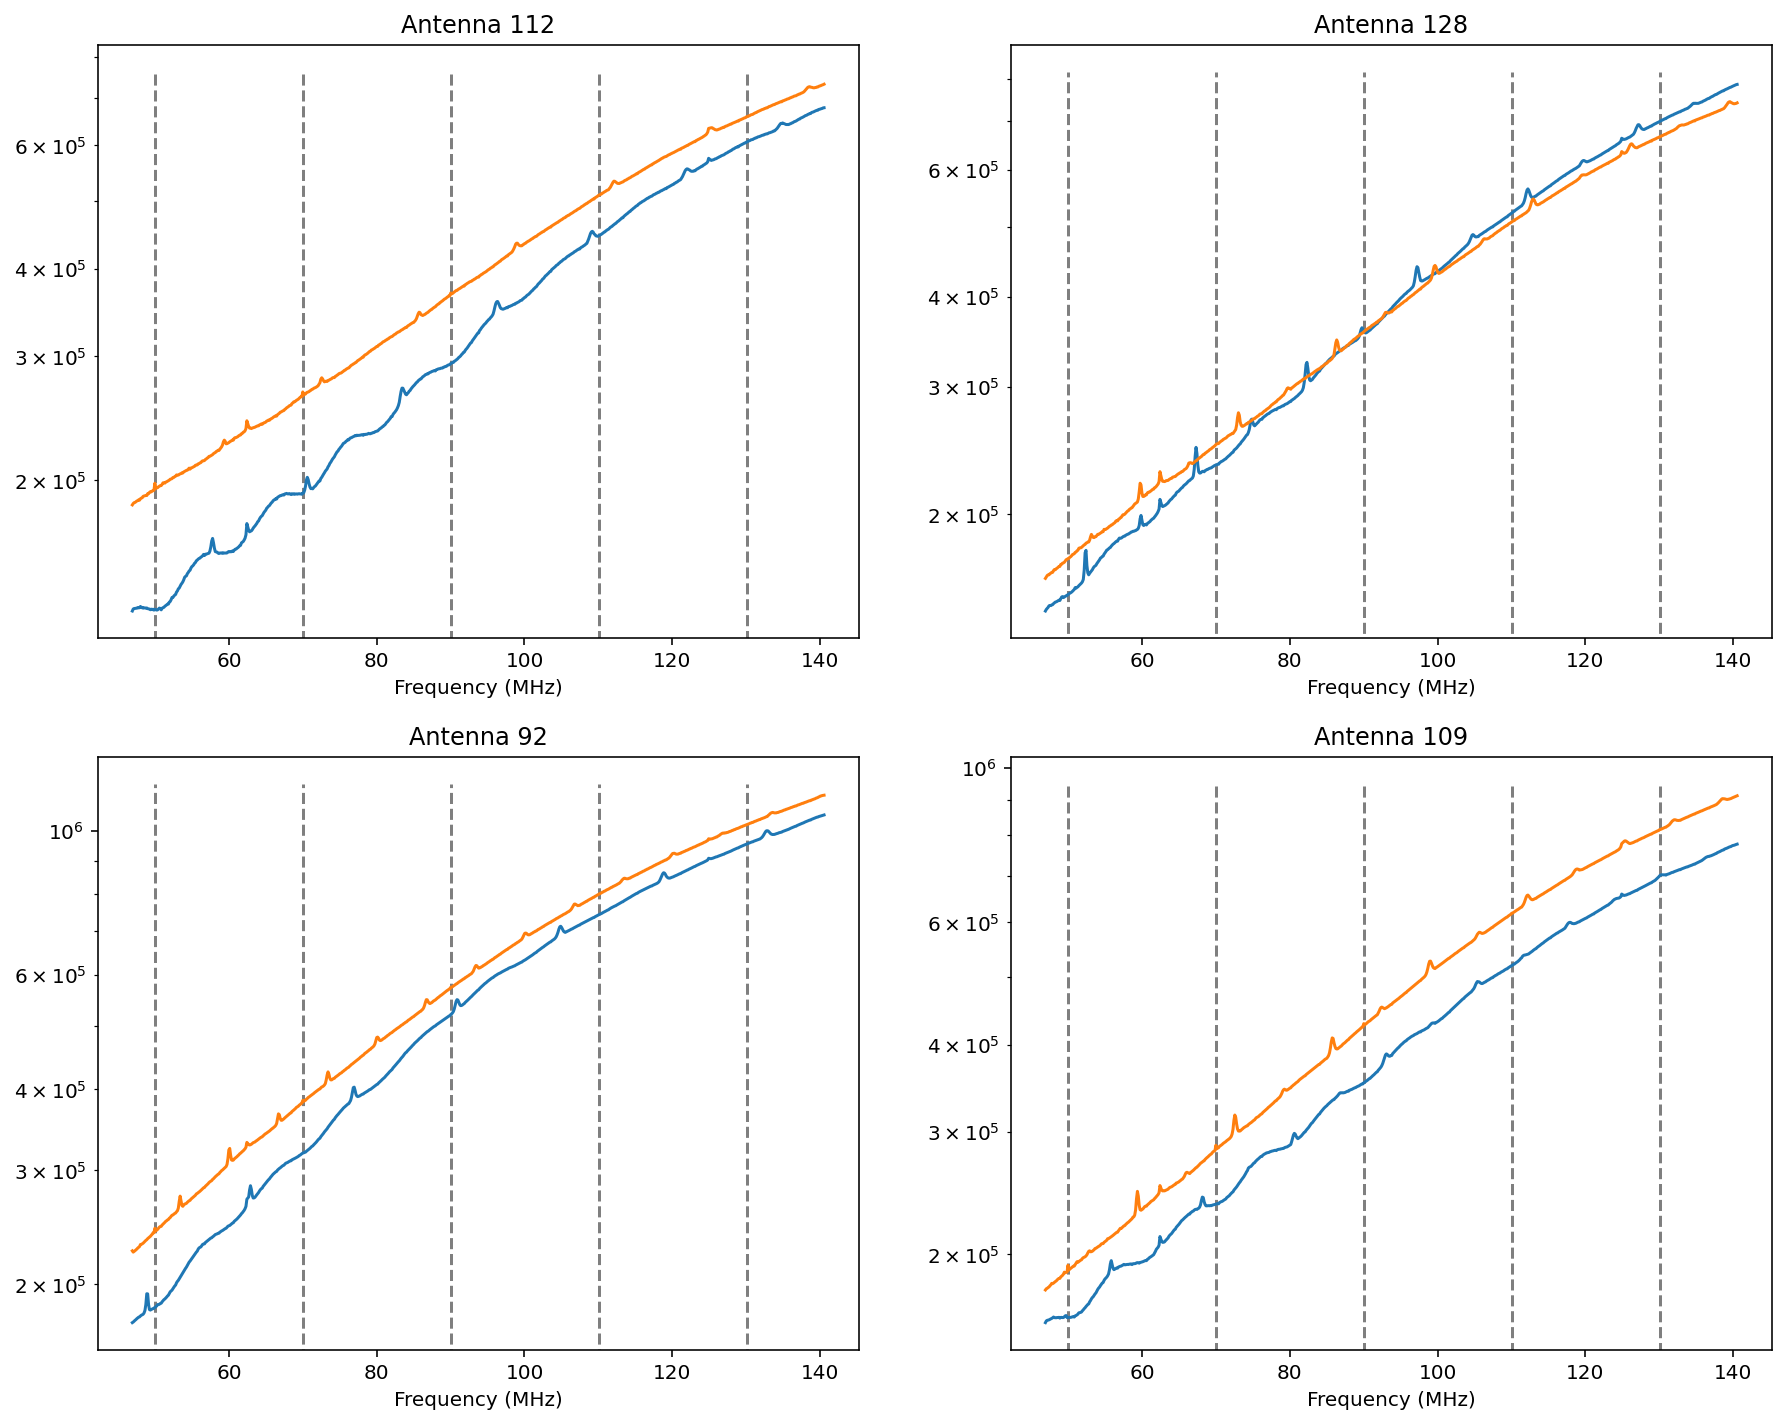

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [15]:
plot_four_noclocks_even(112, 128, 92, 109, 49.973, 20.025, 5)

[ 51.07116699  56.93054199  62.42370605  69.99206543  78.04870605
  87.81433105 109.29870605 117.11120605 124.92370605 138.59558105]
[ 49.97253418  55.58776855  62.42370605  68.03894043  74.14245605
  80.36804199  86.47155762  93.67370605  98.92272949 105.39245605
 111.25183105]
Antenna176 xx and yy
[ 51.07116699  56.93054199  62.42370605  69.99206543  78.04870605
  87.81433105 109.29870605 117.11120605 124.92370605 138.59558105]
[ 49.97253418  55.58776855  62.42370605  68.03894043  74.14245605
  80.36804199  86.47155762  93.67370605  98.92272949 105.39245605
 111.25183105]
Antenna178 xx and yy
[ 51.55944824  58.88366699  66.32995605  73.6541748   81.10046387
  88.42468262 103.19519043 117.96569824 125.4119873  132.61413574]
[ 49.36218262  56.44226074  63.52233887  70.60241699  77.5604248
  84.88464355  91.72058105  98.92272949 105.8807373  113.20495605
 119.91882324]
Antenna177 xx and yy
[ 47.77526855  52.65808105  59.24987793  65.8416748   72.43347168
  79.02526855  85.61706543  92.3

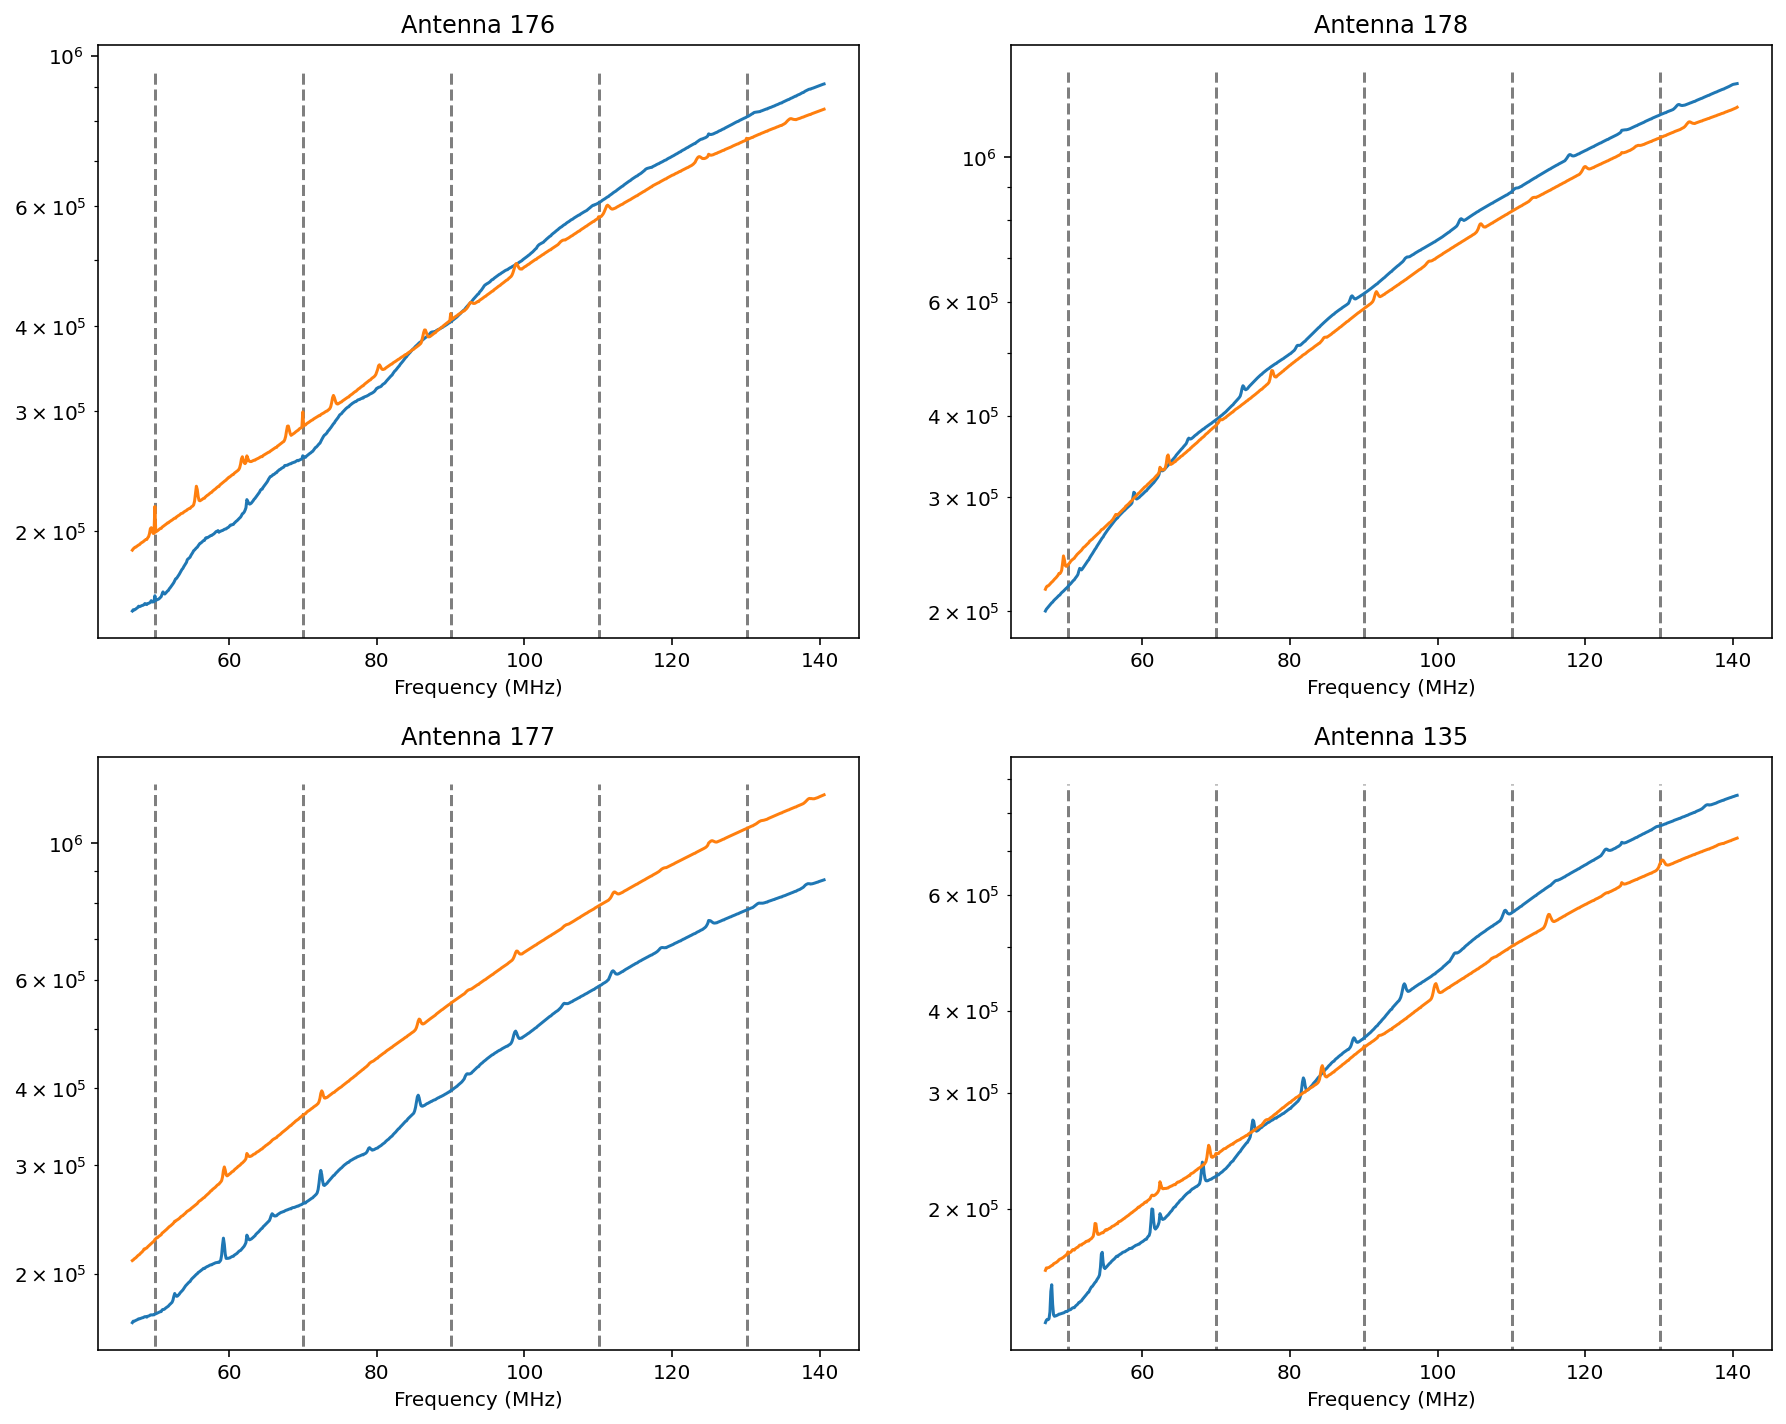

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [16]:
plot_four_noclocks_even(176, 178, 177, 135, 49.973, 20.025, 5)

[ 47.04284668  52.29187012  59.73815918  67.18444824  74.75280762
  82.19909668  89.64538574  97.0916748  104.53796387 111.98425293
 119.43054199]
[ 51.1932373   58.51745605  65.8416748   73.16589355  80.4901123
  87.81433105  95.26062012 102.46276855 115.15808105 121.01745605
 128.82995605]
Antenna165 xx and yy
[ 47.04284668  52.29187012  59.73815918  67.18444824  74.75280762
  82.19909668  89.64538574  97.0916748  104.53796387 111.98425293
 119.43054199]
[ 51.1932373   58.51745605  65.8416748   73.16589355  80.4901123
  87.81433105  95.26062012 102.46276855 115.15808105 121.01745605
 128.82995605]
Antenna185 xx and yy
[ 49.97253418  57.0526123   62.42370605  70.96862793  77.43835449
  83.90808105  90.01159668  96.72546387 103.31726074 109.66491699
 116.37878418]
[ 49.97253418  55.0994873   62.42370605  69.99206543  74.87487793
  81.71081543  90.01159668  95.26062012 108.93249512 124.92370605
 130.05065918]
Antenna164 xx and yy
[ 51.68151855  58.15124512  64.62097168  71.09069824  77.

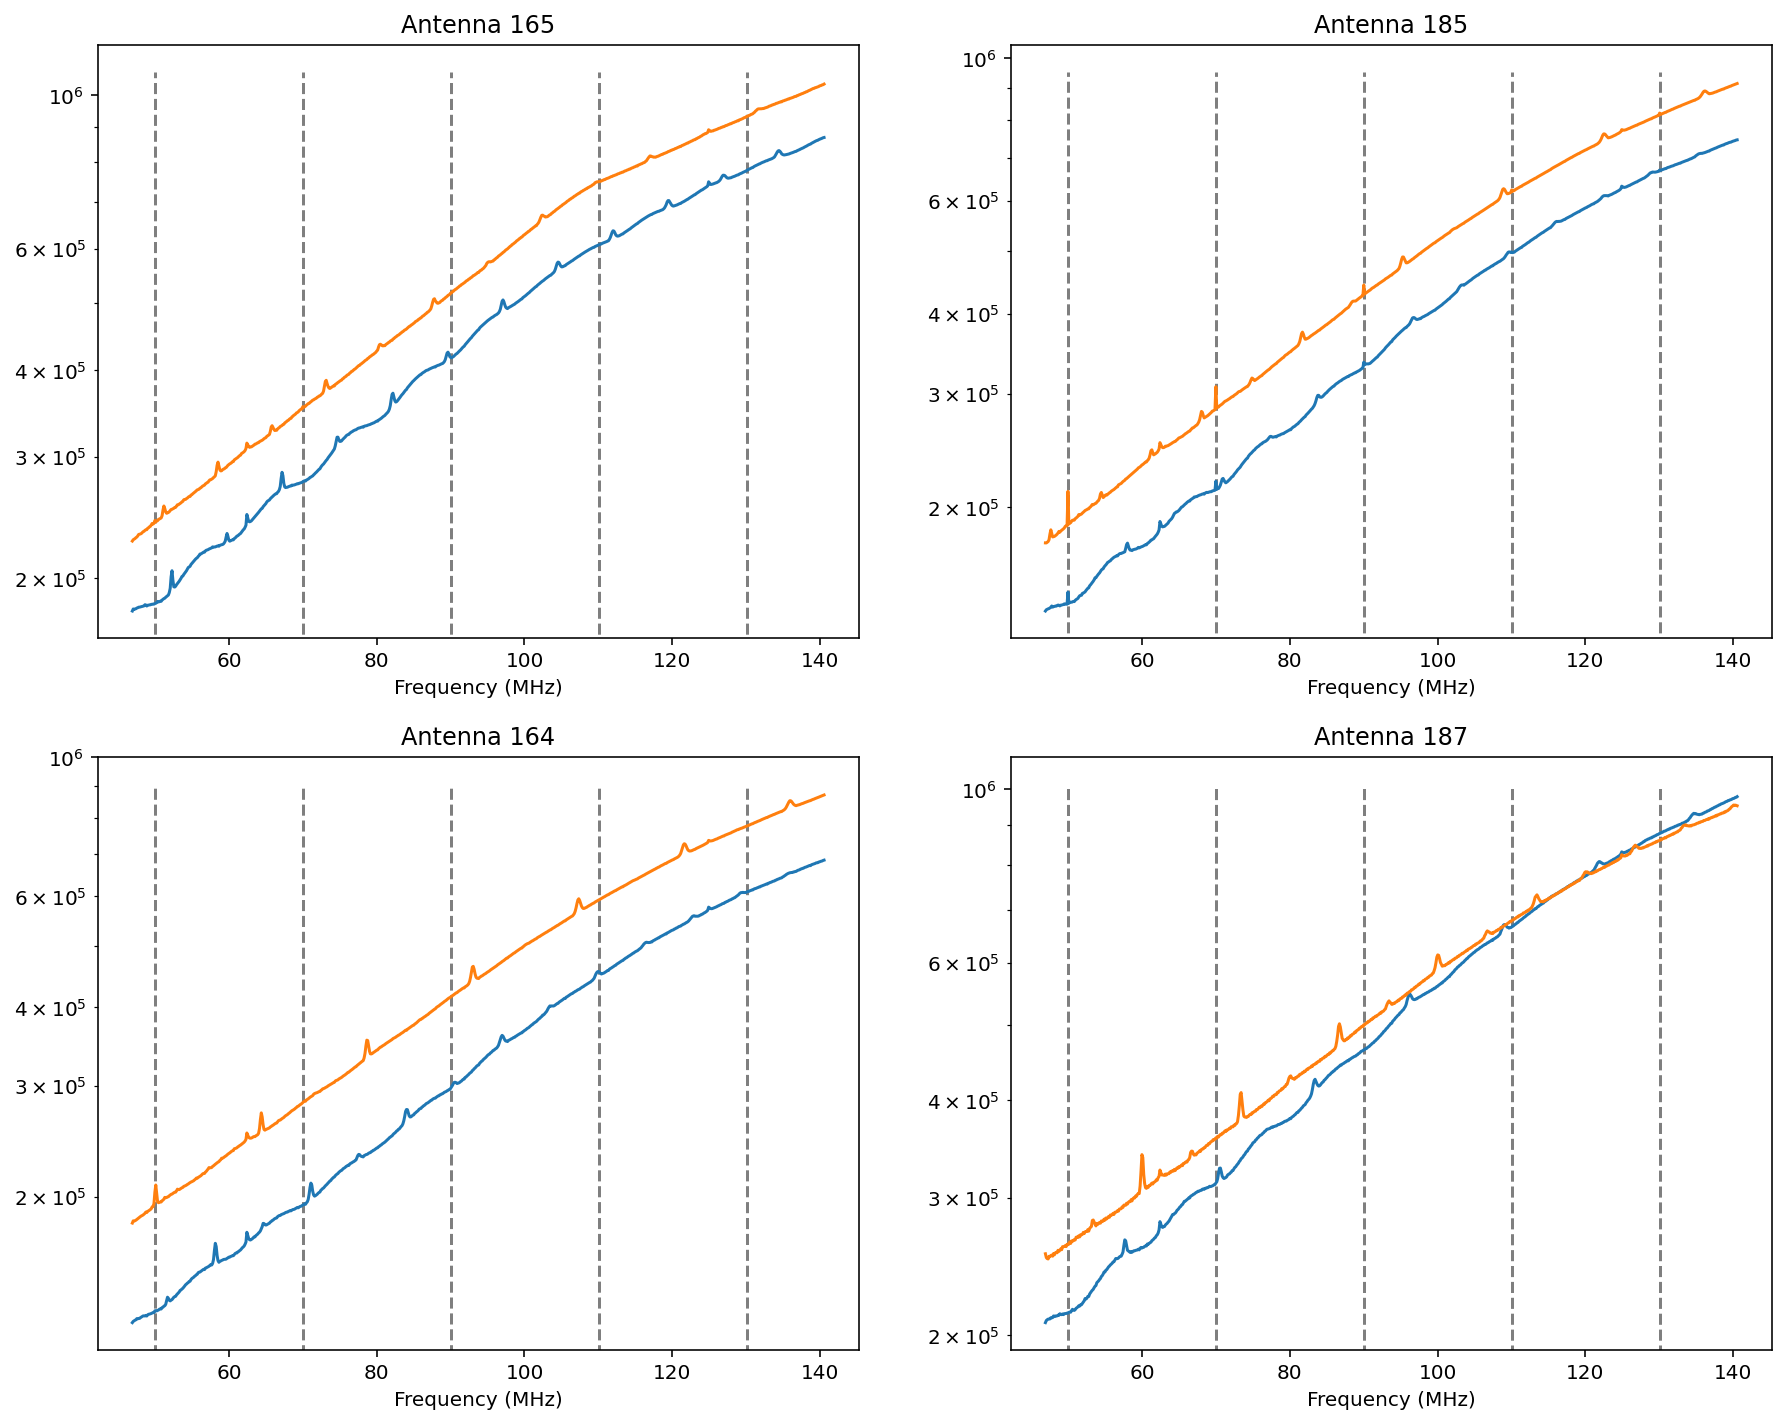

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [17]:
plot_four_noclocks_even(165, 185, 164, 187, 49.973, 20.025, 5)

[ 49.2401123   57.41882324  63.27819824  70.23620605  77.31628418
  84.3963623   91.35437012  98.43444824 105.39245605 112.59460449
 119.5526123 ]
[ 48.62976074  54.48913574  62.42370605  69.99206543  77.80456543
  85.61706543  93.42956543 101.11999512 109.05456543 116.6229248
 126.87683105]
Antenna169 xx and yy
[ 49.2401123   57.41882324  63.27819824  70.23620605  77.31628418
  84.3963623   91.35437012  98.43444824 105.39245605 112.59460449
 119.5526123 ]
[ 48.62976074  54.48913574  62.42370605  69.99206543  77.80456543
  85.61706543  93.42956543 101.11999512 109.05456543 116.6229248
 126.87683105]
Antenna147 xx and yy
[ 50.94909668  57.17468262  62.42370605  69.86999512  82.56530762
  95.38269043 108.07800293 124.92370605 133.71276855]
[ 52.1697998   59.61608887  67.18444824  74.6307373   82.19909668
  89.52331543 104.41589355 110.03112793 119.43054199 124.92370605
 134.32312012]
Antenna170 xx and yy
[ 47.53112793  53.26843262  59.9822998   66.57409668  73.28796387
  79.87976074  86.

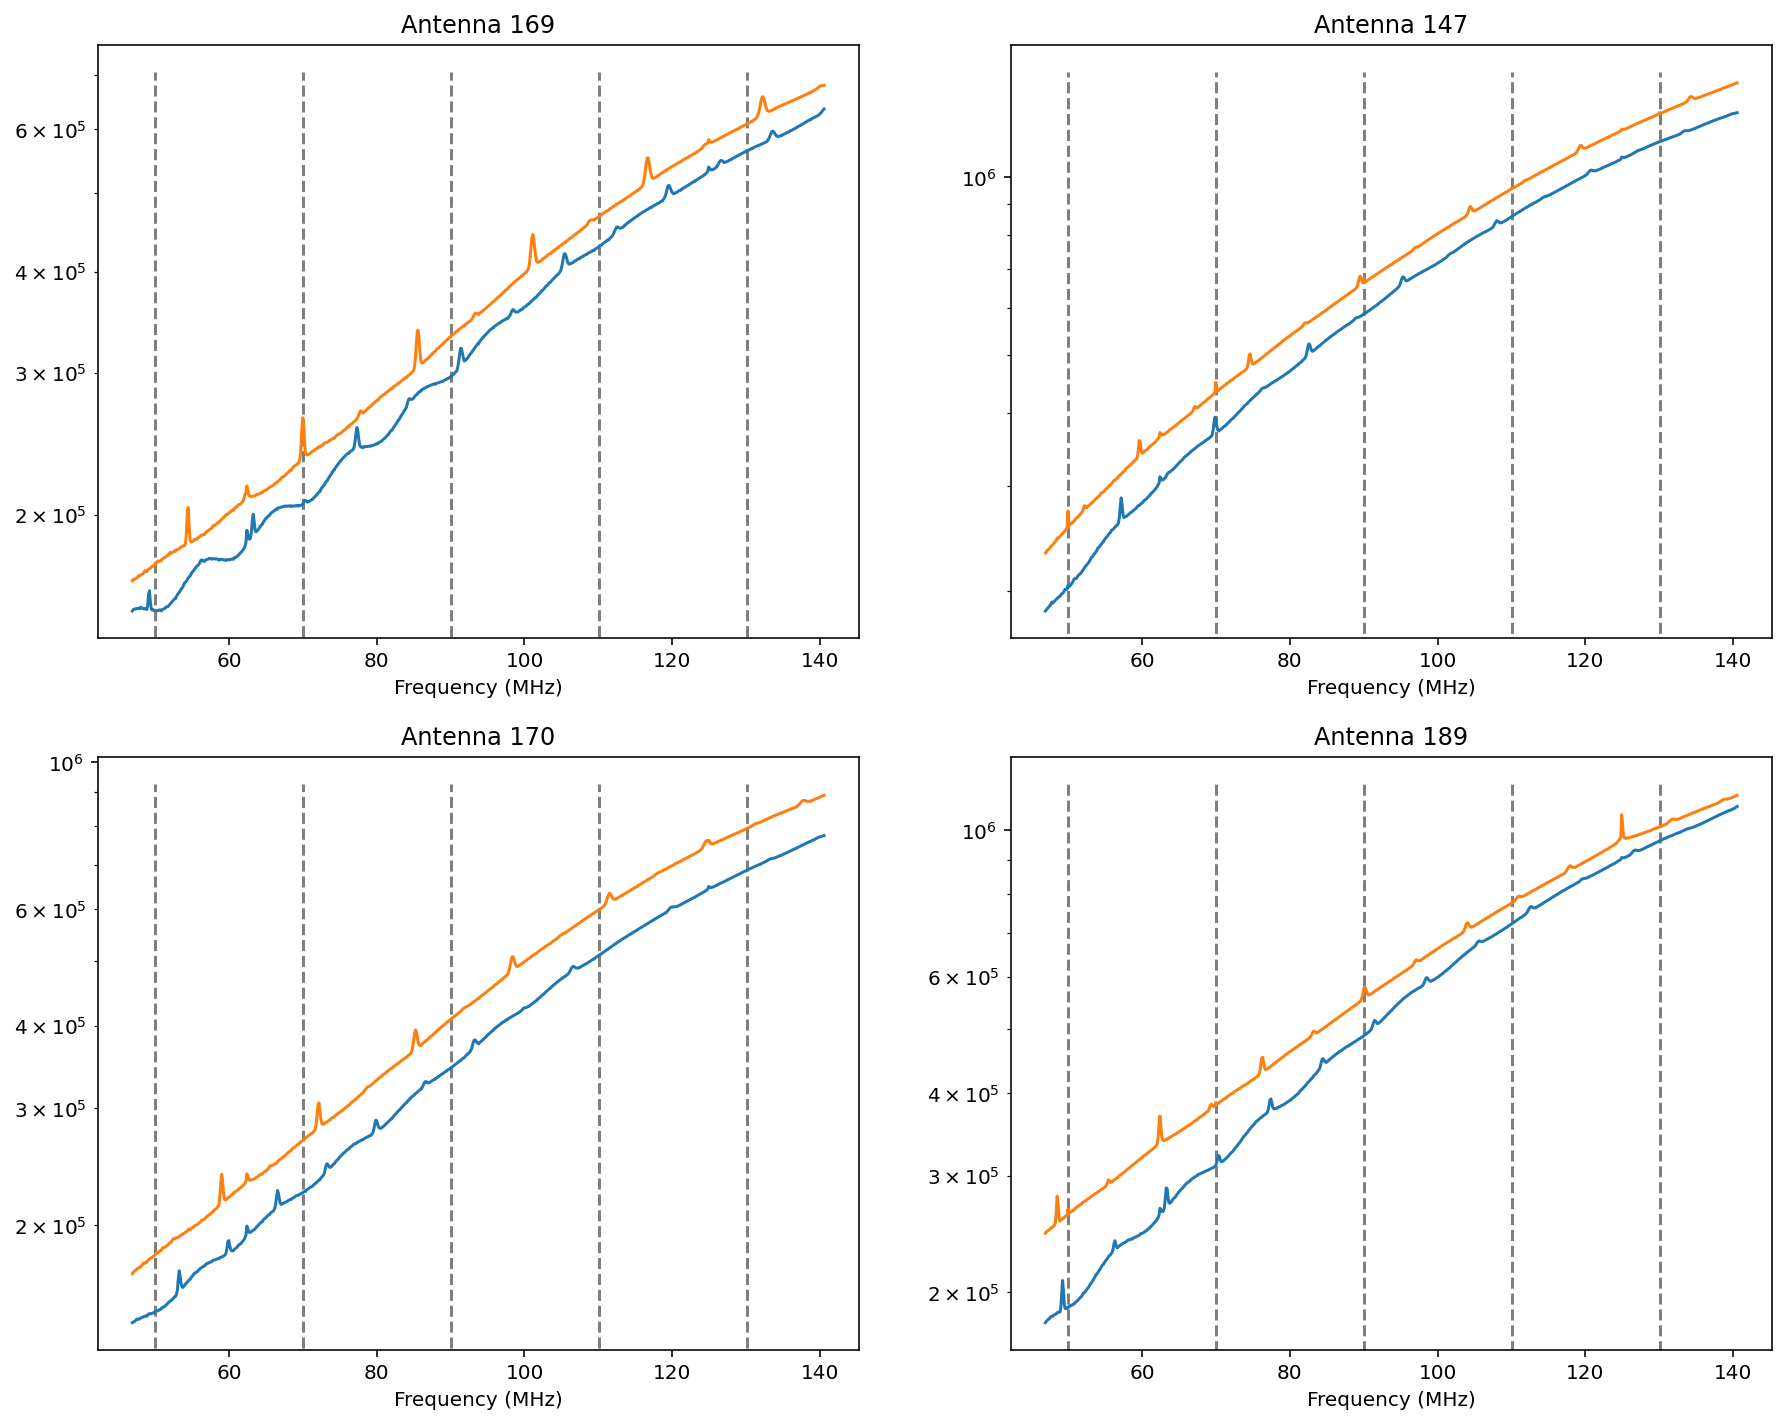

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [18]:
plot_four_noclocks_even(169, 147, 170, 189, 49.973, 20.025, 5)

[ 51.55944824  59.0057373   66.32995605  73.77624512  81.10046387
  88.42468262  95.87097168 103.19519043 110.51940918 117.96569824
 125.28991699]
[ 51.1932373   59.37194824  64.37683105  72.55554199  85.73913574
 103.43933105 112.22839355 125.28991699 138.59558105]
Antenna86 xx and yy
[ 51.55944824  59.0057373   66.32995605  73.77624512  81.10046387
  88.42468262  95.87097168 103.19519043 110.51940918 117.96569824
 125.28991699]
[ 51.1932373   59.37194824  64.37683105  72.55554199  85.73913574
 103.43933105 112.22839355 125.28991699 138.59558105]
Antenna120 xx and yy
[ 52.41394043  57.54089355  62.42370605  68.28308105  74.87487793
  82.4432373   90.01159668  97.33581543 104.9041748  112.47253418
 119.79675293]
[ 48.75183105  53.63464355  60.34851074  67.06237793  73.77624512
  80.4901123   87.20397949  93.91784668 100.75378418 107.34558105
 114.18151855]
Antenna85 xx and yy
[ 50.33874512  57.54089355  64.74304199  71.94519043  79.02526855
  86.3494873   93.42956543 107.8338623  115.1

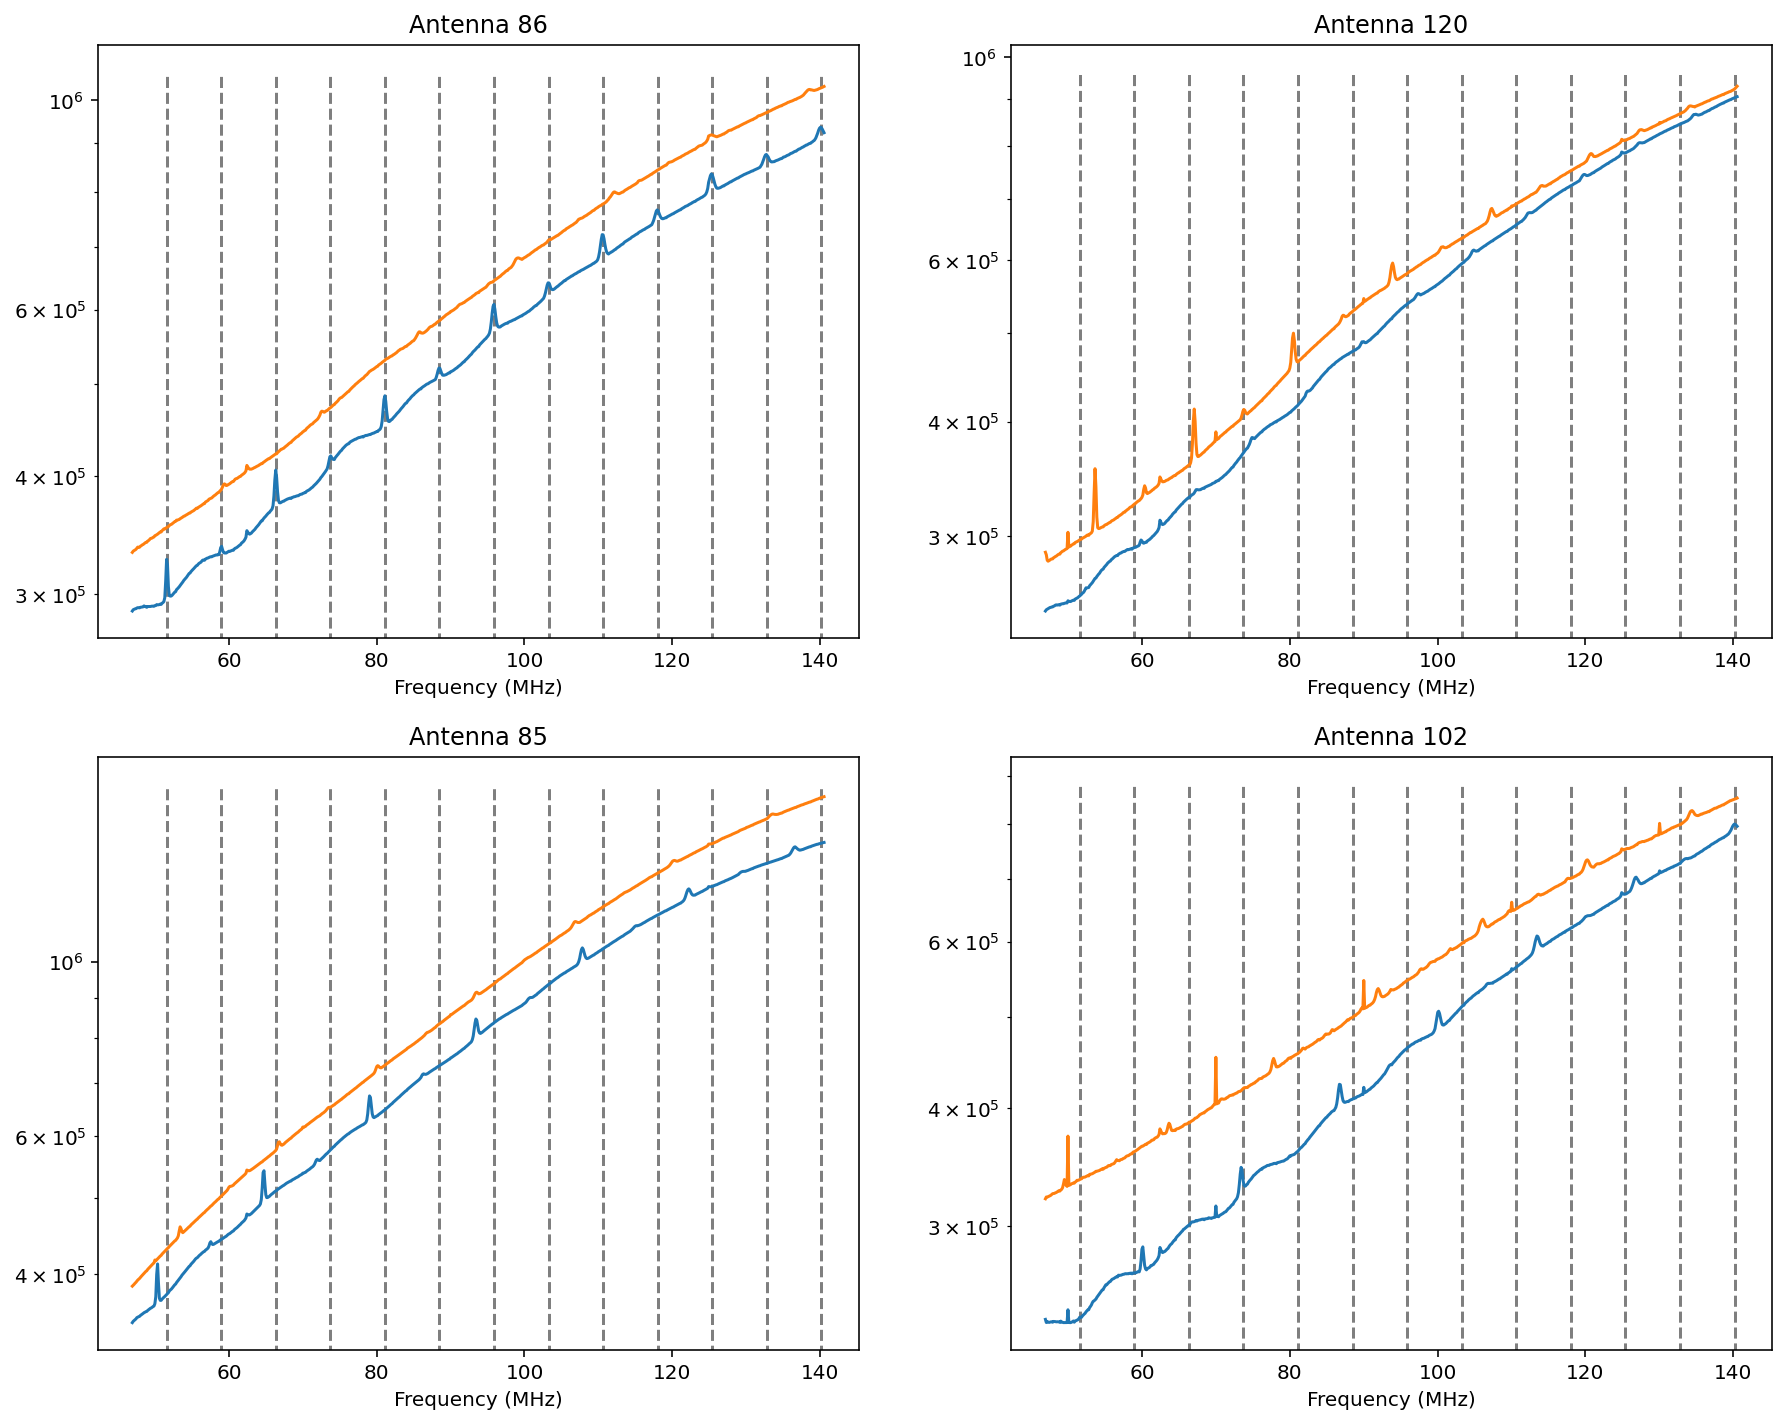

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [8]:
plot_four_noclocks_even(86, 120, 85, 102, 51.559, 7.386, 13)

[ 47.89733887  56.56433105  61.56921387  68.52722168  75.36315918
  82.19909668  89.03503418  95.87097168 102.70690918 109.66491699
 116.37878418]
[ 49.97253418  57.17468262  64.25476074  69.99206543  78.5369873
  85.73913574  92.81921387 102.21862793 110.27526855 118.5760498
 124.92370605]
Antenna14 xx and yy
[ 47.89733887  56.56433105  61.56921387  68.52722168  75.36315918
  82.19909668  89.03503418  95.87097168 102.70690918 109.66491699
 116.37878418]
[ 49.97253418  57.17468262  64.25476074  69.99206543  78.5369873
  85.73913574  92.81921387 102.21862793 110.27526855 118.5760498
 124.92370605]
Antenna39 xx and yy
[ 49.97253418  58.0291748   62.9119873   69.99206543  76.95007324
  81.95495605  90.86608887  98.43444824 106.12487793 116.13464355
 122.97058105]
[ 49.97253418  56.56433105  62.42370605  69.99206543  75.85144043
  82.68737793  90.01159668  95.74890137 106.12487793 124.92370605
 130.05065918]
Antenna25 xx and yy
[ 49.97253418  56.44226074  62.78991699  69.99206543  75.36315

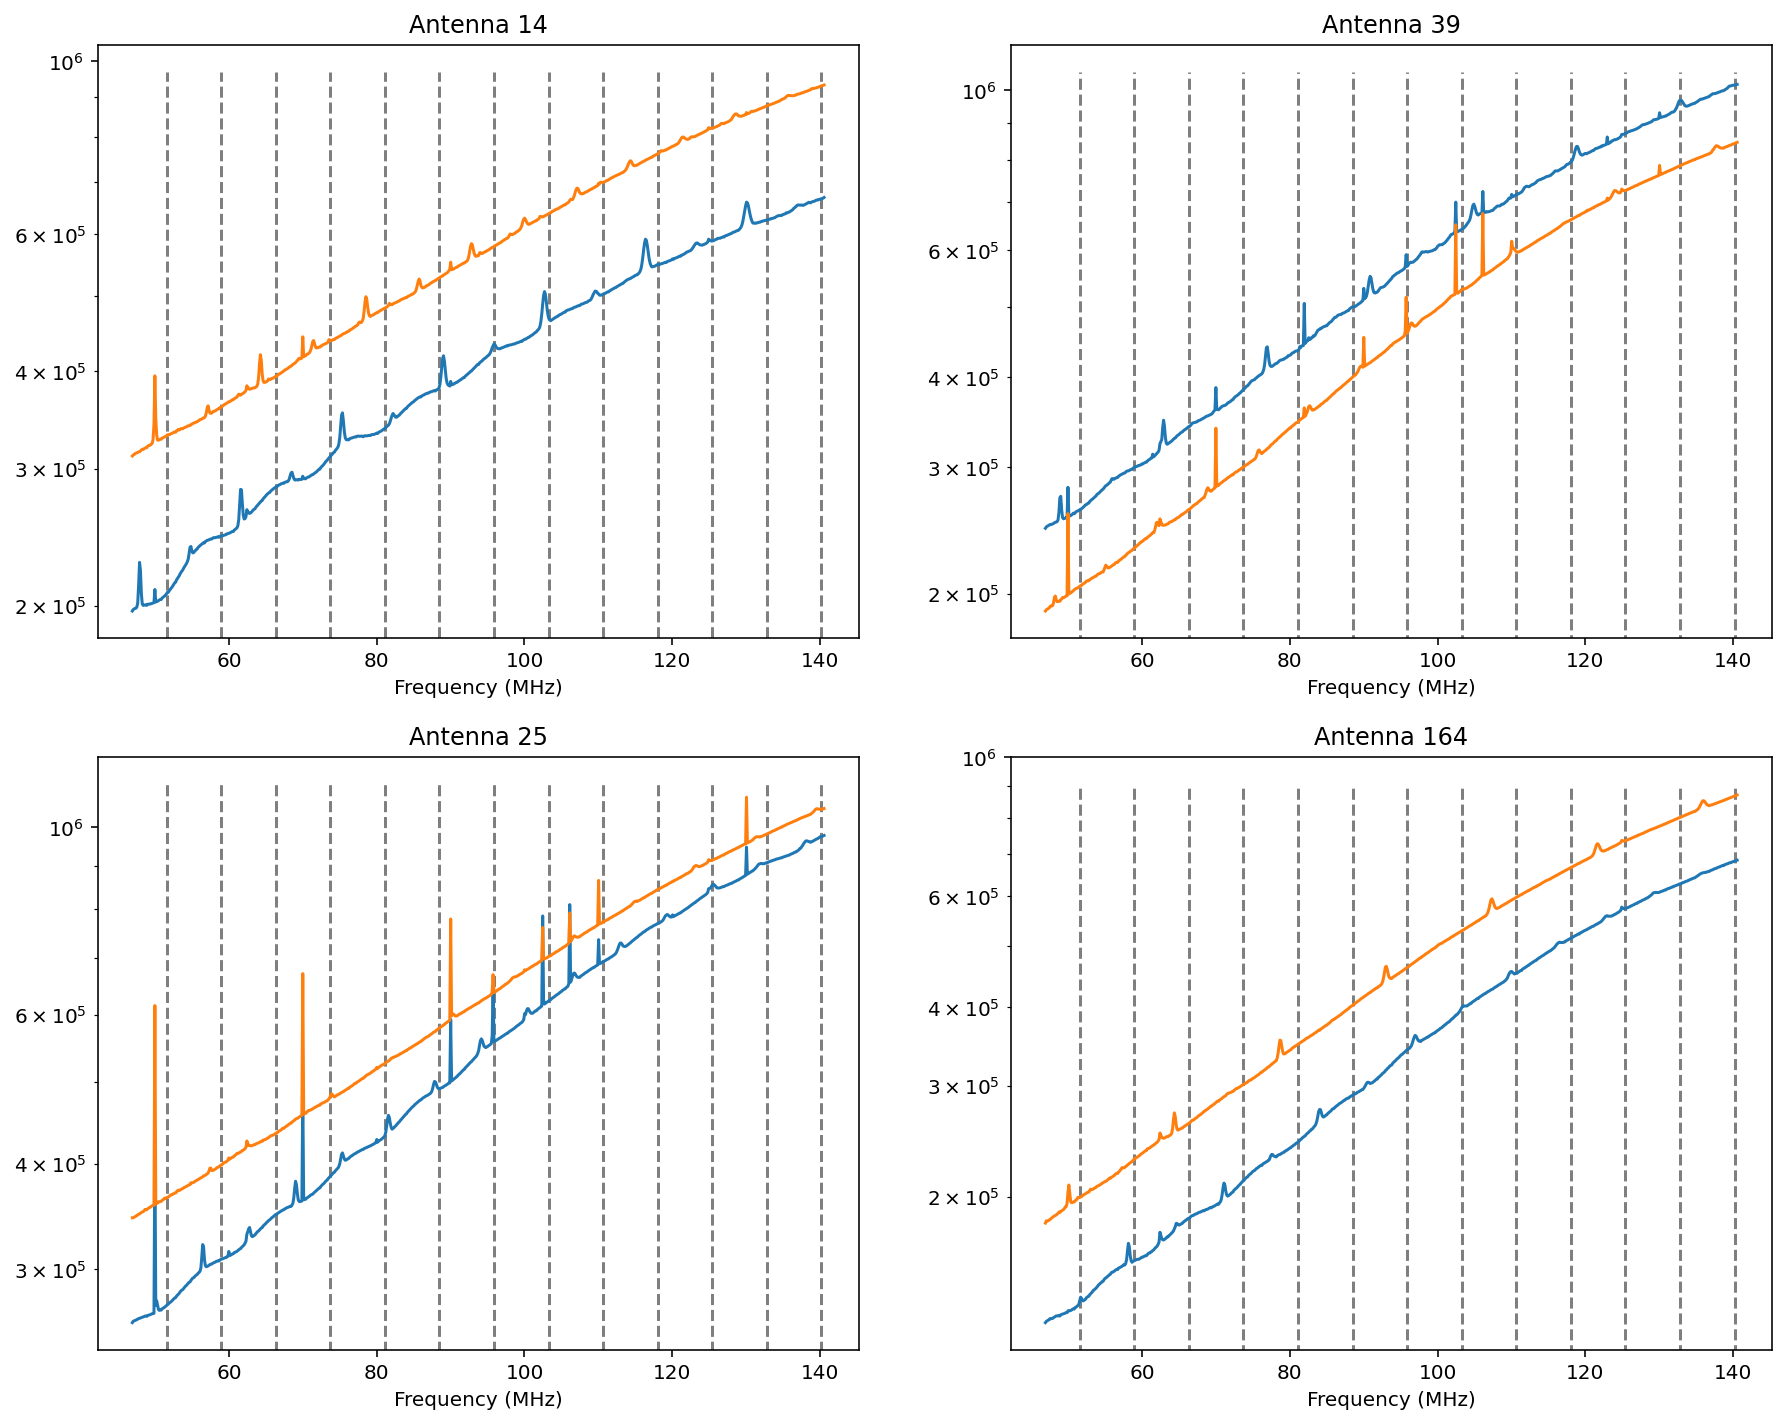

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [9]:
plot_four_noclocks_even(14, 39, 25, 164, 51.559, 7.386, 13)

[ 51.07116699  56.93054199  62.42370605  69.99206543  78.04870605
  87.81433105 109.29870605 117.11120605 124.92370605 138.59558105]
[ 49.97253418  55.58776855  62.42370605  68.03894043  74.14245605
  80.36804199  86.47155762  93.67370605  98.92272949 105.39245605
 111.25183105]
Antenna176 xx and yy
[ 51.07116699  56.93054199  62.42370605  69.99206543  78.04870605
  87.81433105 109.29870605 117.11120605 124.92370605 138.59558105]
[ 49.97253418  55.58776855  62.42370605  68.03894043  74.14245605
  80.36804199  86.47155762  93.67370605  98.92272949 105.39245605
 111.25183105]
Antenna178 xx and yy
[ 51.55944824  58.88366699  66.32995605  73.6541748   81.10046387
  88.42468262 103.19519043 117.96569824 125.4119873  132.61413574]
[ 49.36218262  56.44226074  63.52233887  70.60241699  77.5604248
  84.88464355  91.72058105  98.92272949 105.8807373  113.20495605
 119.91882324]
Antenna177 xx and yy
[ 47.77526855  52.65808105  59.24987793  65.8416748   72.43347168
  79.02526855  85.61706543  92.3

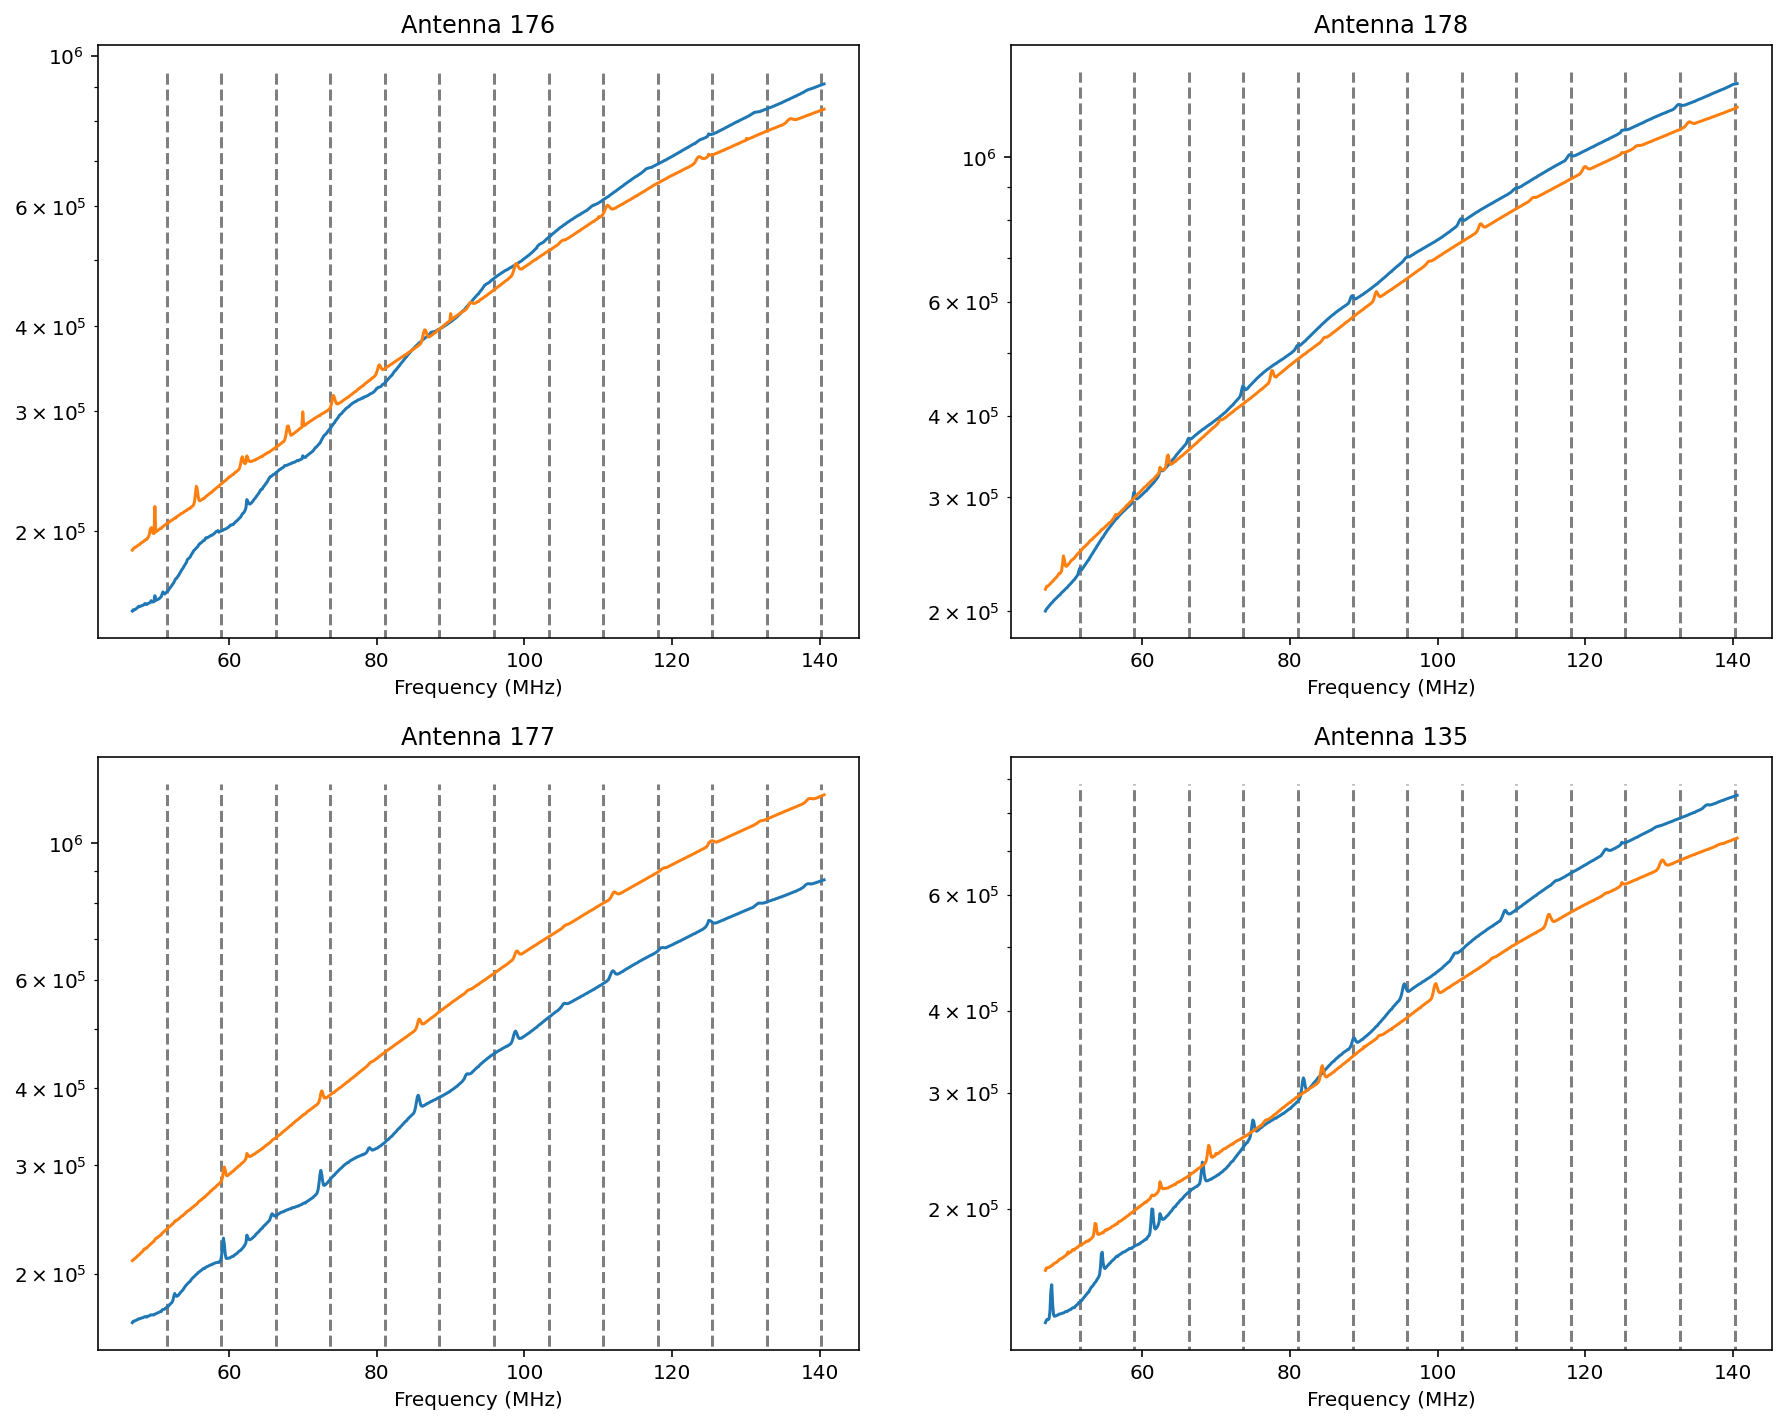

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [20]:
plot_four_noclocks_even(176, 178, 177, 135, 51.559, 7.386, 13)

[ 48.87390137  62.9119873   76.95007324  90.86608887 104.9041748
 118.82019043 124.92370605 132.85827637]
[ 53.39050293  60.10437012  66.69616699  73.41003418  80.12390137
  86.71569824  93.42956543 100.14343262 106.8572998  113.57116699
 120.28503418]
Antenna92 xx and yy
[ 48.87390137  62.9119873   76.95007324  90.86608887 104.9041748
 118.82019043 124.92370605 132.85827637]
[ 53.39050293  60.10437012  66.69616699  73.41003418  80.12390137
  86.71569824  93.42956543 100.14343262 106.8572998  113.57116699
 120.28503418]
Antenna178 xx and yy
[ 51.55944824  58.88366699  66.32995605  73.6541748   81.10046387
  88.42468262 103.19519043 117.96569824 125.4119873  132.61413574]
[ 49.36218262  56.44226074  63.52233887  70.60241699  77.5604248
  84.88464355  91.72058105  98.92272949 105.8807373  113.20495605
 119.91882324]
Antenna177 xx and yy
[ 47.77526855  52.65808105  59.24987793  65.8416748   72.43347168
  79.02526855  85.61706543  92.33093262  98.80065918 105.39245605
 111.98425293]
[ 48.5

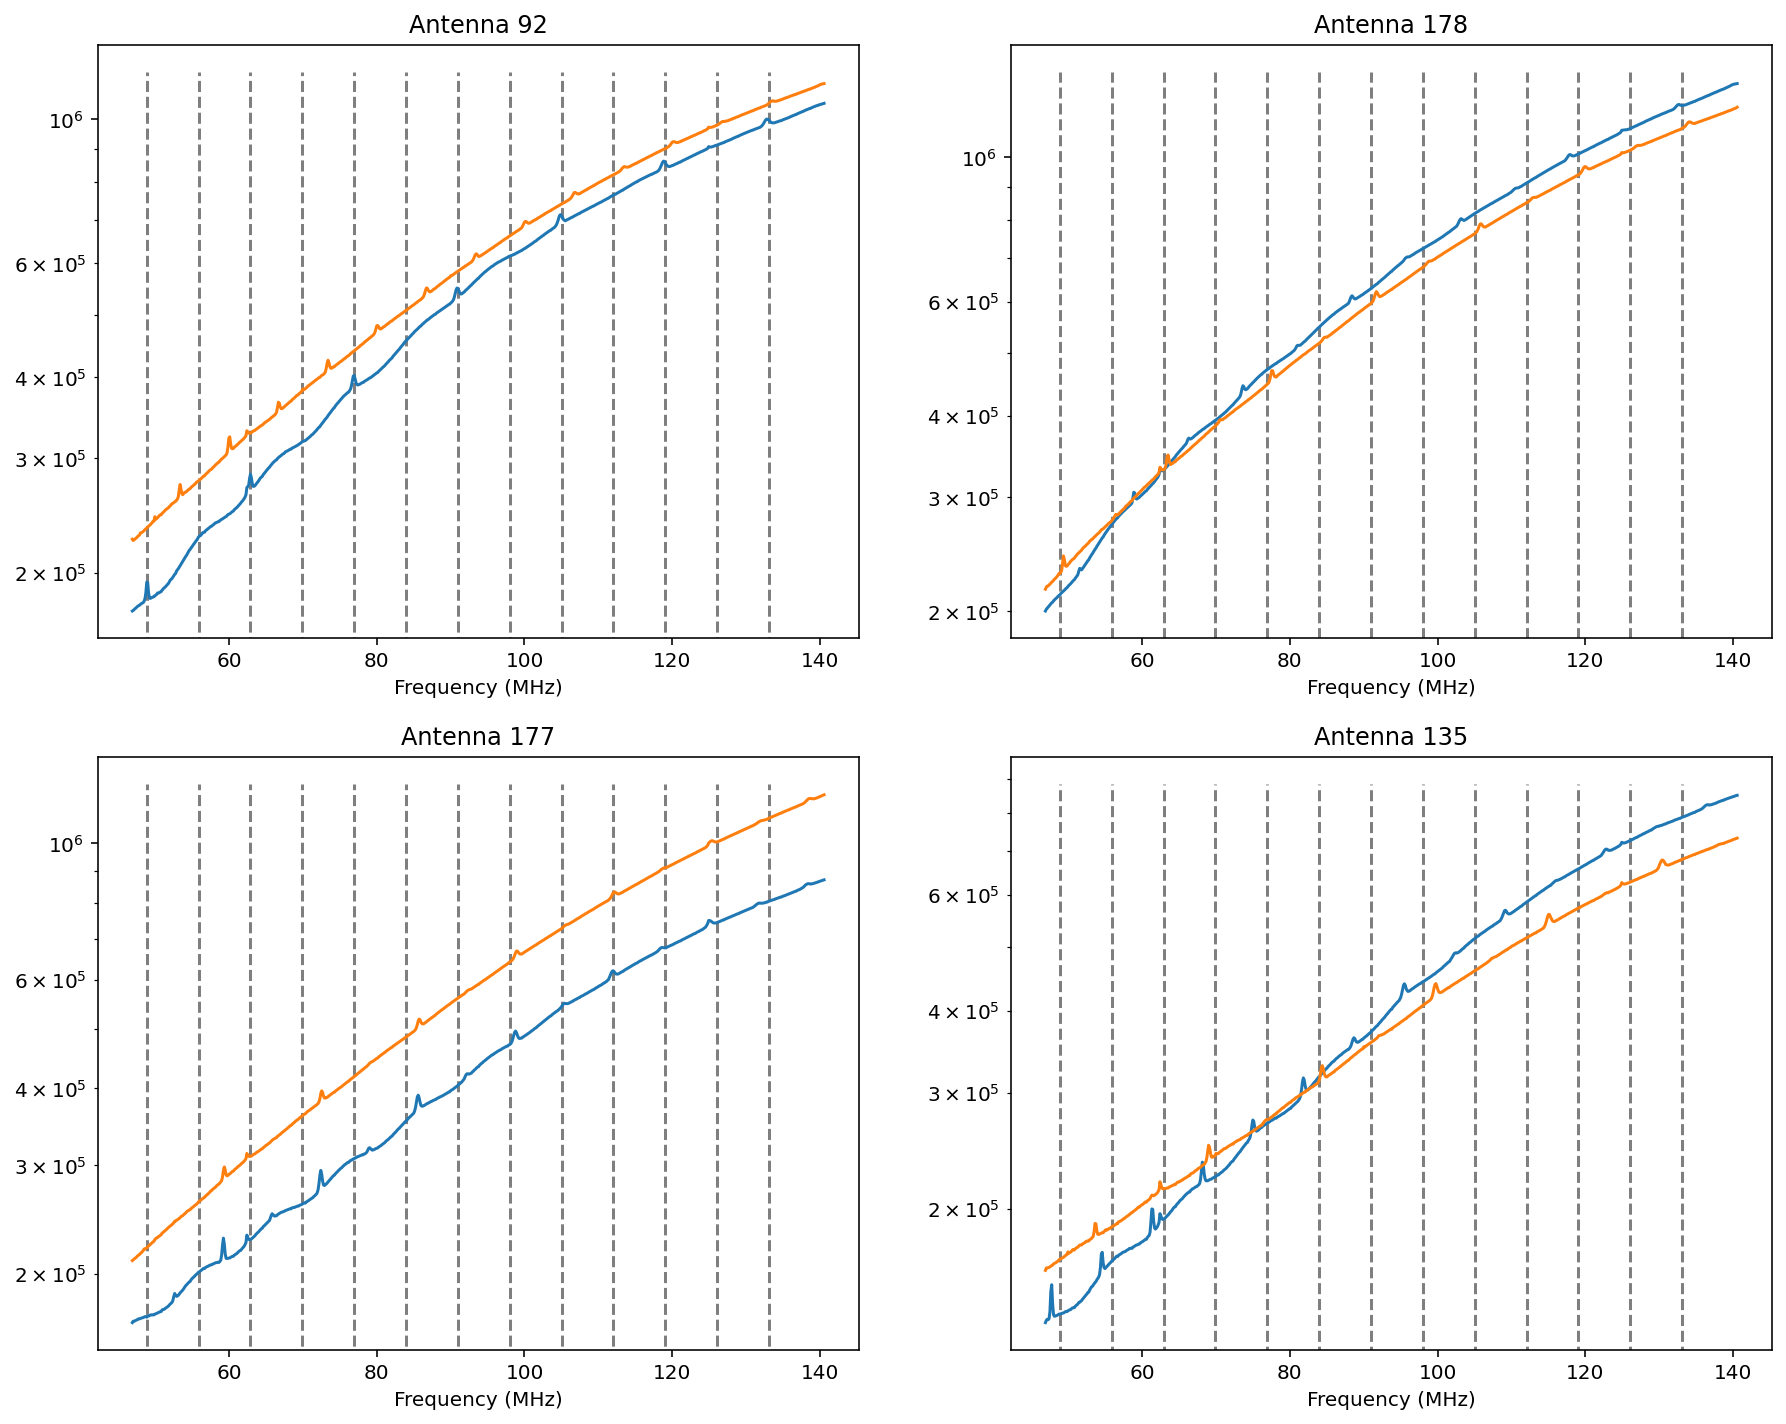

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [21]:
plot_four_noclocks_even(92, 178, 177, 135, 48.874, 7.019, 13)